In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point


## 1- aggregated_volume-2010-2029_with_distance_to_red_light_v2 dataset

In [ ]:
volume=pd.read_csv('/content/aggregated_volume-2010-2029_with_distance_to_red_light_v2.csv')

In [ ]:
volume.columns

Index(['location_id', 'red_light_camera_id', 'distance_to_red_light_camera',
       'red_light_intersection', 'not_red_light_intersection', 'lat', 'lng',
       'Total_Traffic_Volume', 'Total_Pedestrian_Volume',
       'Total_Cyclist_Volume'],
      dtype='object')

In [ ]:
volume.head()

location_id  red_light_camera_id  distance_to_red_light_camera  \
0         1146                  173                         155.0   
1         3925                   77                         642.0   
2         3926                  117                         524.0   
3         3927                   59                         197.0   
4         3931                  125                         105.0   

   red_light_intersection  not_red_light_intersection        lat        lng  \
0                       0                           1  43.773319 -79.246254   
1                       0                           1  43.636780 -79.475274   
2                       0                           1  43.648312 -79.485753   
3                       0                           1  43.659235 -79.328436   
4                       0                           1  43.634479 -79.408712   

   Total_Traffic_Volume  Total_Pedestrian_Volume  Total_Cyclist_Volume  
0                 23616                      515                    10  
1                  9887                       68                     3  
2                 36890                     3082                   332  
3                 21869                      783                    60  
4                 45867                    10533                  2116

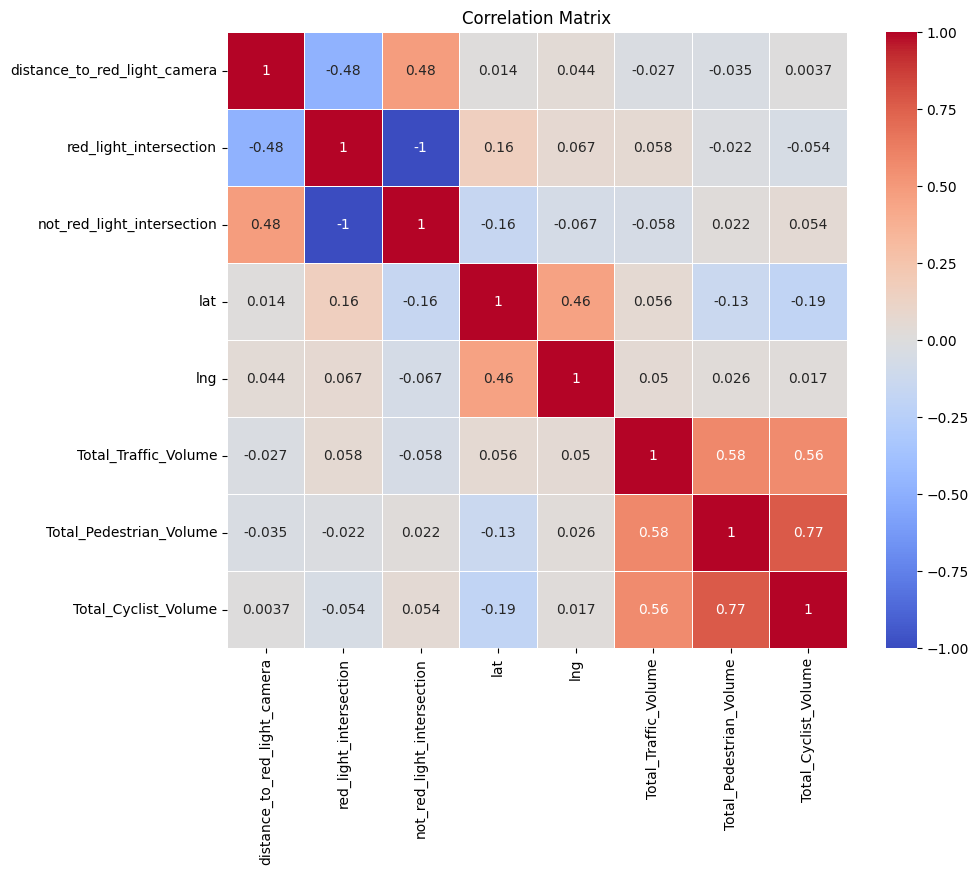

In [ ]:
volume.drop(['location_id','red_light_camera_id'],axis=1,inplace=True)
corr_matrix = volume.corr()
# print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

r^2 -- 40% [not good]

In [ ]:
import statsmodels.api as sm
volume = volume.apply(pd.to_numeric, errors='coerce')
volume = volume.fillna(0)

X = volume.drop(columns=['Total_Traffic_Volume'])
y = volume['Total_Traffic_Volume']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Total_Traffic_Volume   R-squared:                       0.404
Model:                              OLS   Adj. R-squared:                  0.403
Method:                   Least Squares   F-statistic:                     346.9
Date:                  Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                          23:37:44   Log-Likelihood:                -35636.
No. Observations:                  3078   AIC:                         7.129e+04
Df Residuals:                      3071   BIC:                         7.133e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

r^2 -- 62% [not good], p value is high

In [ ]:
volume = volume.apply(pd.to_numeric, errors='coerce')
volume = volume.fillna(0)

X = volume.drop(columns=['Total_Pedestrian_Volume'])
y = volume['Total_Pedestrian_Volume']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Total_Pedestrian_Volume   R-squared:                       0.629
Model:                                 OLS   Adj. R-squared:                  0.628
Method:                      Least Squares   F-statistic:                     868.4
Date:                     Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                             23:37:44   Log-Likelihood:                -32379.
No. Observations:                     3078   AIC:                         6.477e+04
Df Residuals:                         3071   BIC:                         6.481e+04
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

best model 63%, good P value

In [ ]:
volume = volume.apply(pd.to_numeric, errors='coerce')
volume = volume.fillna(0)

X = volume.drop(columns=['Total_Cyclist_Volume'])
y = volume['Total_Cyclist_Volume']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Total_Cyclist_Volume   R-squared:                       0.629
Model:                              OLS   Adj. R-squared:                  0.628
Method:                   Least Squares   F-statistic:                     866.7
Date:                  Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                          23:37:44   Log-Likelihood:                -26352.
No. Observations:                  3078   AIC:                         5.272e+04
Df Residuals:                      3071   BIC:                         5.276e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

volume = volume.apply(pd.to_numeric, errors='coerce')
volume = volume.fillna(0)

X = volume.drop(columns=['Total_Cyclist_Volume'])
y = volume['Total_Cyclist_Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")

R-squared: 0.7661575695133019


feature importance

                        Feature  Importance
6       Total_Pedestrian_Volume    0.694763
5          Total_Traffic_Volume    0.152545
3                           lat    0.076141
4                           lng    0.049106
0  distance_to_red_light_camera    0.026852
2    not_red_light_intersection    0.000372
1        red_light_intersection    0.000222


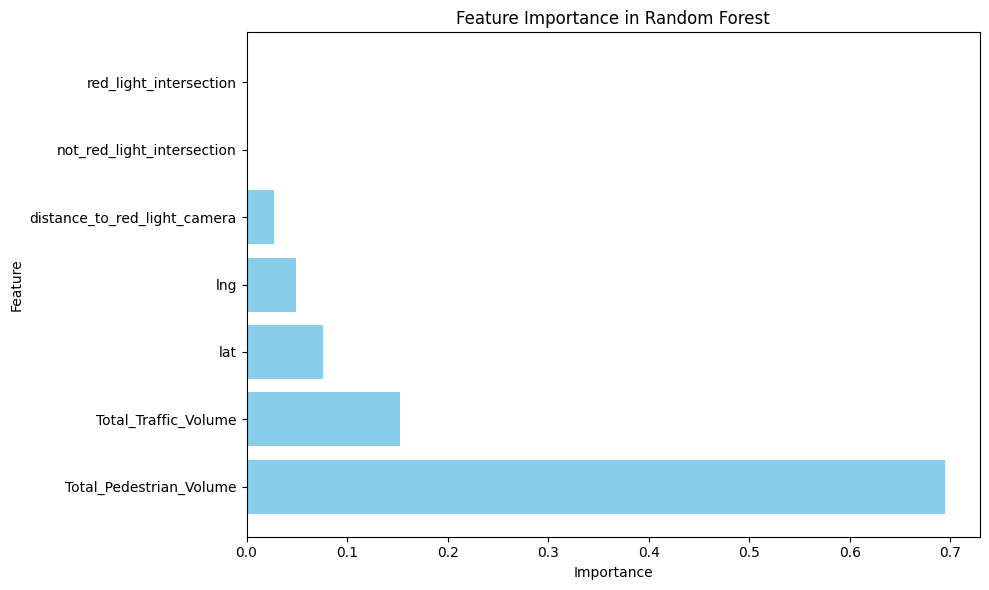

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.tight_layout()
plt.show()

## 2- red_light_camera_with_coordinates -dataset
this dataset is not compatible with regresion/clustering

In [ ]:
red=pd.read_csv('/content/red_light_camera_with_coordinates.csv')

In [ ]:
red.columns

Index(['_id', 'INTERSECTION_ID', 'LINEAR_NAME_FULL_1', 'LINEAR_NAME_FULL_2',
       'MI_PRINX', 'OBJECTID', 'ID', 'CLIENT_STREET_1', 'CLIENT_STREET_2',
       'RLC', 'TCS', 'NAME', 'ADDITIONAL_INFO', 'MAIN', 'SIDE1', 'SIDE2',
       'MID_BLOCK', 'PRIVATE_ACCESS', 'DISTRICT', 'WARD_1', 'WARD_2', 'WARD_3',
       'WARD_4', 'POLICE_DIVISION_1', 'POLICE_DIVISION_2', 'POLICE_DIVISION_3',
       'ACTIVATION_DATE', 'geometry', 'geo_coordinates'],
      dtype='object')

In [ ]:
red.head()

_id  INTERSECTION_ID LINEAR_NAME_FULL_1 LINEAR_NAME_FULL_2  MI_PRINX  \
0    1       13465959.0      Richmond St E      Parliament St         1   
1    2       13467993.0  Lake Shore Blvd W            York St         2   
2    3       13444656.0      Steeles Ave W       Carpenter Rd         3   
3    4       13444138.0      Steeles Ave W          Hilda Ave         4   
4    5       13451893.0          Albion Rd     Silverstone Dr         5   

   OBJECTID  ID    CLIENT_STREET_1 CLIENT_STREET_2   RLC  ...  \
0         1   1      RICHMOND ST E   PARLIAMENT ST  6001  ...   
1         2   2  LAKE SHORE BLVD W         YORK ST  6002  ...   
2         3   3      STEELES AVE W    CARPENTER RD  6003  ...   
3         4   4      STEELES AVE W       HILDA AVE  6004  ...   
4         5   5          ALBION RD  SILVERSTONE DR  6005  ...   

                  WARD_1 WARD_2 WARD_3 WARD_4 POLICE_DIVISION_1  \
0     Toronto Centre(13)    NaN    NaN    NaN                51   
1  Spadina-Fort York(10)    NaN    NaN    NaN                52   
2         York Centre(6)    NaN    NaN    NaN                32   
3         Willowdale(18)    NaN    NaN    NaN                32   
4     Etobicoke North(1)    NaN    NaN    NaN                23   

  POLICE_DIVISION_2 POLICE_DIVISION_3      ACTIVATION_DATE  \
0               NaN               NaN  2007-11-09T05:00:00   
1               NaN               NaN  2007-11-09T05:00:00   
2               NaN               NaN  2007-11-09T05:00:00   
3               NaN               NaN  2007-11-09T05:00:00   
4               NaN               NaN  2007-11-09T05:00:00   

                                            geometry  \
0  {'type': 'MultiPoint', 'coordinates': [[-79.36...   
1  {'type': 'MultiPoint', 'coordinates': [[-79.38...   
2  {'type': 'MultiPoint', 'coordinates': [[-79.44...   
3  {'type': 'MultiPoint', 'coordinates': [[-79.42...   
4  {'type': 'MultiPoint', 'coordinates': [[-79.60...   

                         geo_coordinates  
0  (-79.3640229981536, 43.6545590110734)  
1  (-79.3808680070637, 43.6414600021636)  
2   (-79.447588998966, 43.7920130014137)  
3  (-79.4292670008865, 43.7960070062936)  
4  (-79.6000939933117, 43.7429520012624)  

[5 rows x 29 columns]

In [ ]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id                 296 non-null    int64  
 1   INTERSECTION_ID     284 non-null    float64
 2   LINEAR_NAME_FULL_1  284 non-null    object 
 3   LINEAR_NAME_FULL_2  284 non-null    object 
 4   MI_PRINX            296 non-null    int64  
 5   OBJECTID            296 non-null    int64  
 6   ID                  296 non-null    int64  
 7   CLIENT_STREET_1     296 non-null    object 
 8   CLIENT_STREET_2     296 non-null    object 
 9   RLC                 296 non-null    int64  
 10  TCS                 296 non-null    int64  
 11  NAME                296 non-null    object 
 12  ADDITIONAL_INFO     16 non-null     object 
 13  MAIN                296 non-null    object 
 14  SIDE1               296 non-null    object 
 15  SIDE2               67 non-null     object 
 16  MID_BLOC

In [ ]:
red.columns

Index(['_id', 'INTERSECTION_ID', 'LINEAR_NAME_FULL_1', 'LINEAR_NAME_FULL_2',
       'MI_PRINX', 'OBJECTID', 'ID', 'CLIENT_STREET_1', 'CLIENT_STREET_2',
       'RLC', 'TCS', 'NAME', 'ADDITIONAL_INFO', 'MAIN', 'SIDE1', 'SIDE2',
       'MID_BLOCK', 'PRIVATE_ACCESS', 'DISTRICT', 'WARD_1', 'WARD_2', 'WARD_3',
       'WARD_4', 'POLICE_DIVISION_1', 'POLICE_DIVISION_2', 'POLICE_DIVISION_3',
       'ACTIVATION_DATE', 'geometry', 'geo_coordinates'],
      dtype='object')

In [ ]:
red.drop(['_id',"INTERSECTION_ID",'MI_PRINX', 'OBJECTID', 'ID',"WARD_3",'WARD_4','POLICE_DIVISION_3'],axis=1,inplace=True)

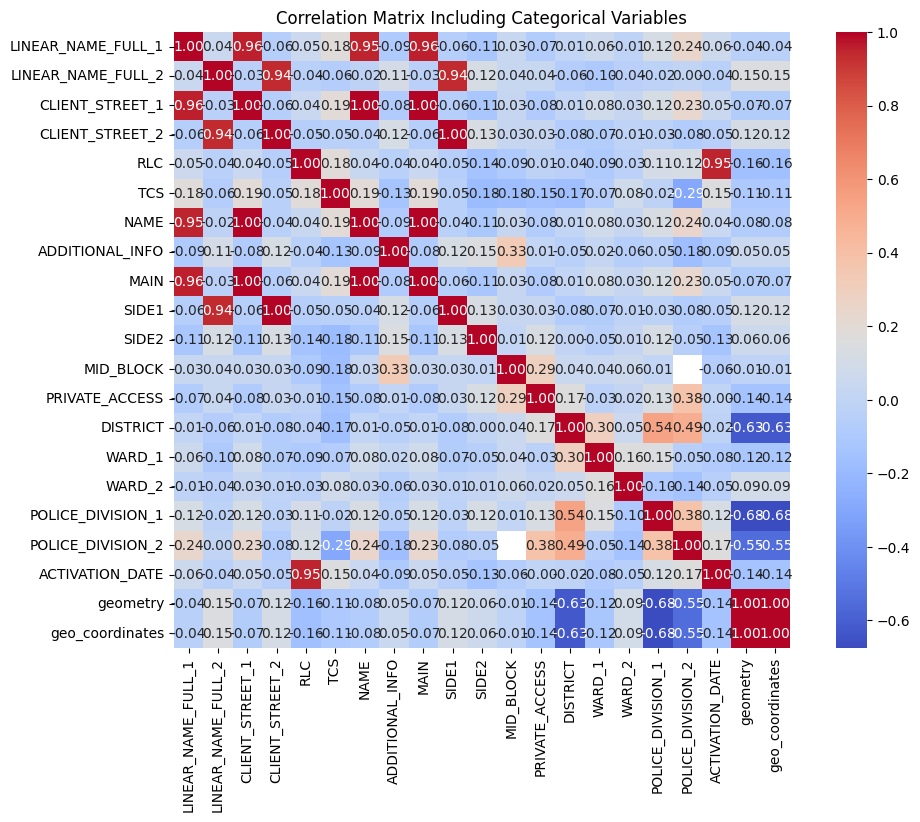

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for column in red.columns:
    if red[column].dtype == 'object':
        le = LabelEncoder()
        red[column] = le.fit_transform(red[column])
        label_encoders[column] = le
correlation_matrix = red.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Including Categorical Variables')
plt.show()

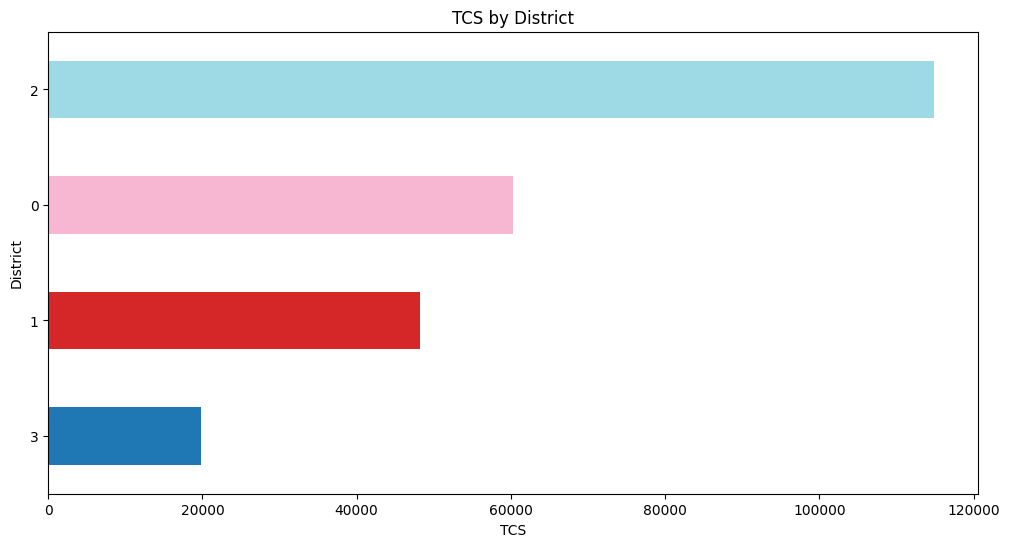

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

traffic_by_district = red.groupby('DISTRICT')['TCS'].sum().sort_values()
cmap = plt.get_cmap('tab20', len(traffic_by_district))
colors = [cmap(i) for i in range(len(traffic_by_district))]

plt.figure(figsize=(12, 6))
traffic_by_district.plot(kind='barh', color=colors)
plt.title('TCS by District')
plt.xlabel('TCS')
plt.ylabel('District')
plt.show()


<ipython-input-19-c581c837c007>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DISTRICT', y='TCS', data=red, palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a fu

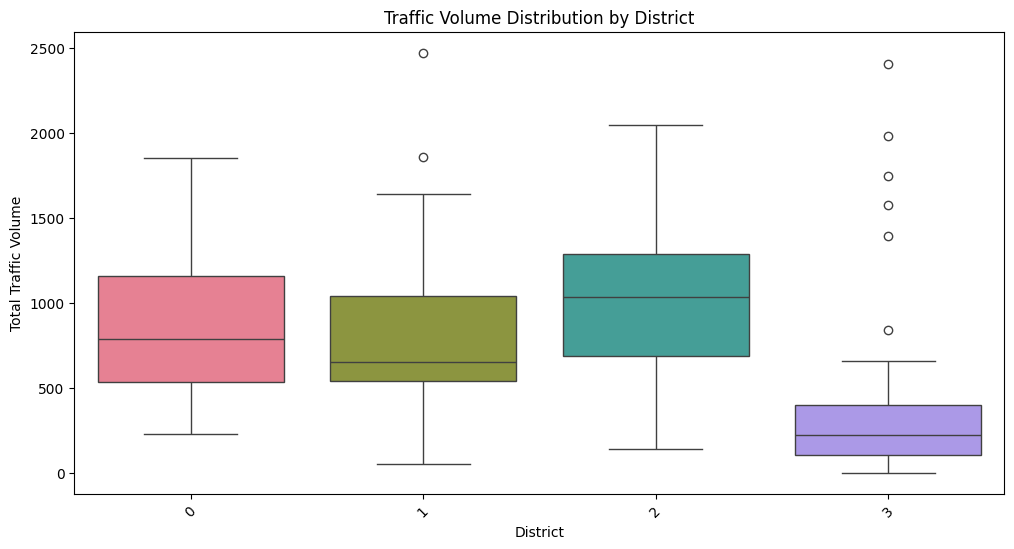

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(red['DISTRICT'].unique()))

sns.boxplot(x='DISTRICT', y='TCS', data=red, palette=palette)
plt.title('Traffic Volume Distribution by District')
plt.xticks(rotation=45)
plt.xlabel('District')
plt.ylabel('Total Traffic Volume')
plt.show()



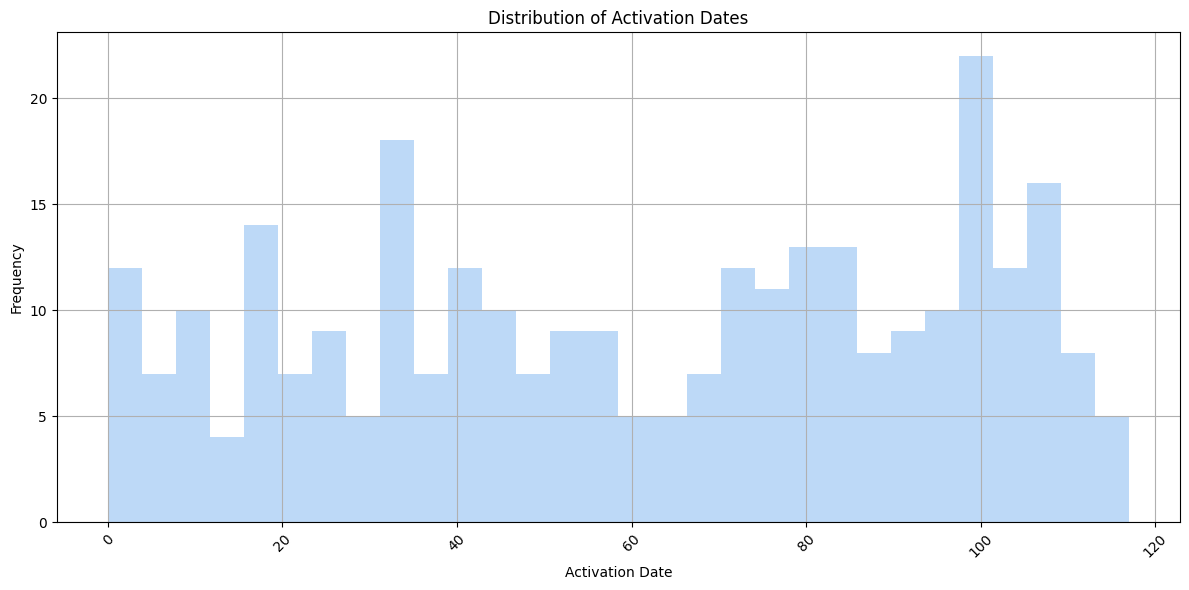

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette_color = sns.color_palette("pastel")[0]

plt.figure(figsize=(12, 6))
plt.hist(red['ACTIVATION_DATE'], bins=30, color=palette_color, alpha=0.7)
plt.title('Distribution of Activation Dates')
plt.xlabel('Activation Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


## 3 - final_cleaned_dataset

In [ ]:
final=pd.read_csv('/content/final_cleaned_dataset_2.csv')

In [ ]:
final.head()

_id       OCC_DATE OCC_MONTH    OCC_DOW  OCC_YEAR  OCC_HOUR DIVISION  \
0  437826  1577854800000   January  Wednesday      2020      20.0      D31   
1  437827  1577854800000   January  Wednesday      2020       6.0      D43   
2  437828  1577854800000   January  Wednesday      2020       1.0      D23   
3  437829  1577854800000   January  Wednesday      2020       5.0      D33   
4  437830  1577854800000   January  Wednesday      2020      13.0      D31   

   FATALITIES  INJURY_COLLISIONS  FTR_COLLISIONS  ...  MOTORCYCLE  PASSENGER  \
0         NaN                0.0             0.0  ...         0.0        0.0   
1         NaN                0.0             1.0  ...         0.0        0.0   
2         NaN                0.0             0.0  ...         0.0        0.0   
3         NaN                0.0             0.0  ...         0.0        0.0   
4         NaN                0.0             0.0  ...         0.0        0.0   

  BICYCLE  PEDESTRIAN                                           geometry  \
0     0.0         0.0  {'type': 'MultiPoint', 'coordinates': [[-79.49...   
1     0.0         0.0  {'type': 'MultiPoint', 'coordinates': [[-79.19...   
2     0.0         0.0  {'type': 'MultiPoint', 'coordinates': [[-79.55...   
3     0.0         0.0  {'type': 'MultiPoint', 'coordinates': [[-79.33...   
4     0.0         0.0  {'type': 'MultiPoint', 'coordinates': [[-79.54...   

                     geo_coordinates  distance_to_intersection  \
0  (-79.4907046439999, 43.722333846)                 62.598220   
1  (-79.197483405, 43.7589449910001)                231.373712   
2      (-79.550892489, 43.677195667)                  0.370506   
3      (-79.336668973, 43.797327083)                 85.994760   
4  (-79.5423651999999, 43.752072387)                  1.753488   

   intersection_id  traffic_volume_intersection  \
0             5947                            0   
1             4420                            0   
2             5977                            1   
3             4367                            0   
4             3968                            1   

   not_traffic_volume_intersection  
0                                1  
1                                1  
2                                0  
3                                1  
4                                0  

[5 rows x 26 columns]

In [ ]:
final.columns

Index(['_id', 'OCC_DATE', 'OCC_MONTH', 'OCC_DOW', 'OCC_YEAR', 'OCC_HOUR',
       'DIVISION', 'FATALITIES', 'INJURY_COLLISIONS', 'FTR_COLLISIONS',
       'PD_COLLISIONS', 'HOOD_158', 'NEIGHBOURHOOD_158', 'LONG_WGS84',
       'LAT_WGS84', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER', 'BICYCLE',
       'PEDESTRIAN', 'geometry', 'geo_coordinates', 'distance_to_intersection',
       'intersection_id', 'traffic_volume_intersection',
       'not_traffic_volume_intersection'],
      dtype='object')

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206303 entries, 0 to 206302
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   _id                              206303 non-null  int64  
 1   OCC_DATE                         206303 non-null  int64  
 2   OCC_MONTH                        206303 non-null  object 
 3   OCC_DOW                          206303 non-null  object 
 4   OCC_YEAR                         206303 non-null  int64  
 5   OCC_HOUR                         206303 non-null  float64
 6   DIVISION                         206303 non-null  object 
 7   FATALITIES                       201 non-null     float64
 8   INJURY_COLLISIONS                206301 non-null  float64
 9   FTR_COLLISIONS                   206301 non-null  float64
 10  PD_COLLISIONS                    206301 non-null  float64
 11  HOOD_158                         206303 non-null  int64  
 12  NE

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = final.select_dtypes(include=['object']).columns
for column in categorical_columns:
    final[column] = label_encoder.fit_transform(final[column].astype(str))

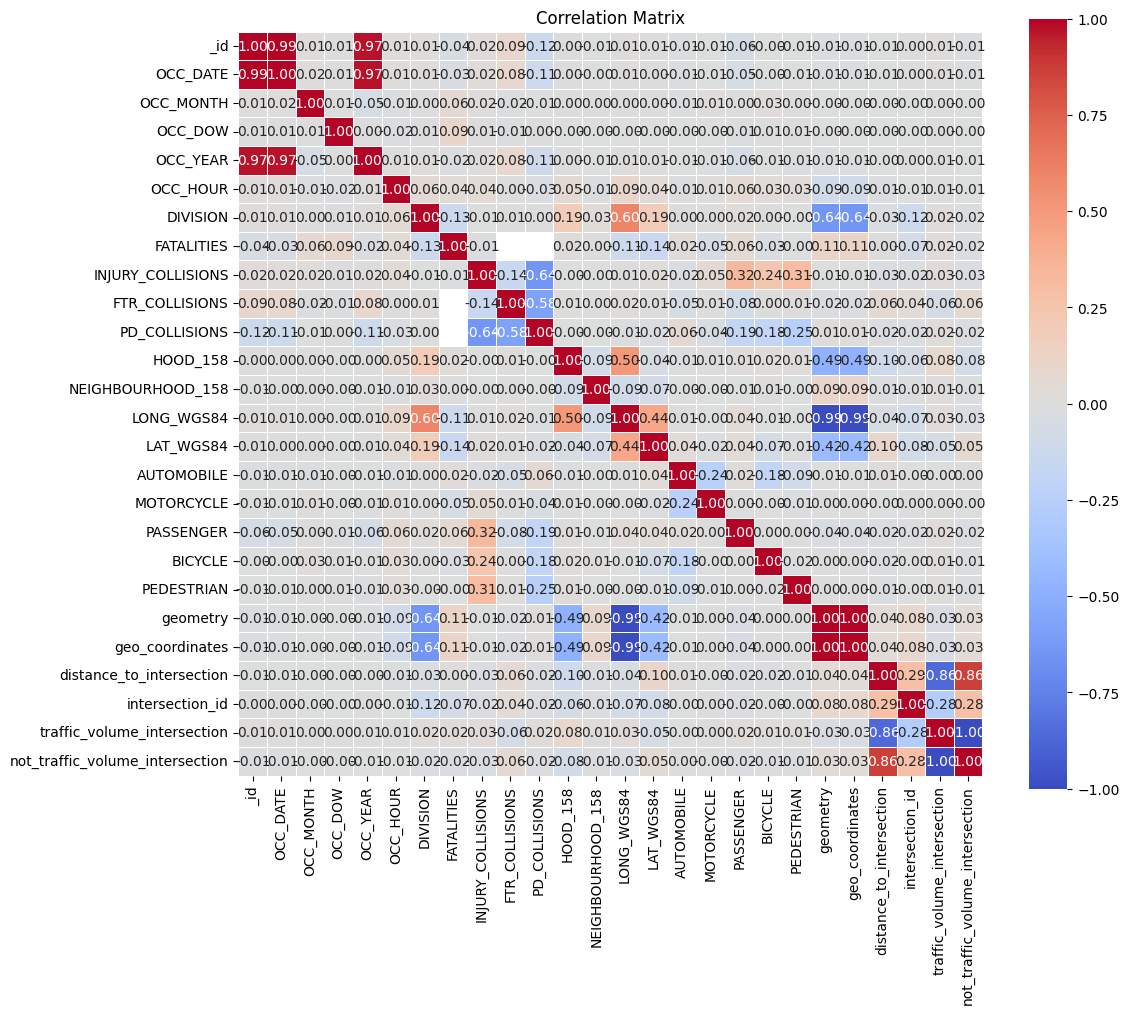

In [ ]:
correlation_matrix = final.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Project

In [ ]:
final=pd.read_csv('/content/final_cleaned_dataset_2.csv')

In [ ]:
red=pd.read_csv('/content/red_light_camera_with_coordinates.csv')

In [ ]:
print(final['intersection_id'].nunique())

3070


In [ ]:
volume=pd.read_csv('/content/aggregated_volume-2010-2029_with_distance_to_red_light_v3.csv')

In [ ]:
print(volume['location_id'].nunique())

3078


In [ ]:
final.shape

(206303, 26)

In [ ]:
volume.shape

(3078, 10)

In [ ]:
merged_data = volume.merge(final, left_on='location_id', right_on='intersection_id', how='inner')


In [ ]:
merged_data.shape

(203168, 36)

In [ ]:
merged_data.head()

location_id  red_light_camera_id  distance_to_red_light_camera  \
0         1146                  173                         155.0   
1         1146                  173                         155.0   
2         1146                  173                         155.0   
3         1146                  173                         155.0   
4         1146                  173                         155.0   

   red_light_intersection  not_red_light_intersection        lat        lng  \
0                       0                           1  43.773319 -79.246254   
1                       0                           1  43.773319 -79.246254   
2                       0                           1  43.773319 -79.246254   
3                       0                           1  43.773319 -79.246254   
4                       0                           1  43.773319 -79.246254   

   Total_Traffic_Volume  Total_Pedestrian_Volume  Total_Cyclist_Volume  ...  \
0                 23616                      515                    10  ...   
1                 23616                      515                    10  ...   
2                 23616                      515                    10  ...   
3                 23616                      515                    10  ...   
4                 23616                      515                    10  ...   

   MOTORCYCLE  PASSENGER BICYCLE PEDESTRIAN  \
0         0.0        0.0     0.0        0.0   
1         0.0        0.0     0.0        0.0   
2         0.0        0.0     0.0        0.0   
3         0.0        0.0     0.0        0.0   
4         0.0        0.0     0.0        0.0   

                                            geometry  \
0  {'type': 'MultiPoint', 'coordinates': [[-79.24...   
1  {'type': 'MultiPoint', 'coordinates': [[-79.24...   
2  {'type': 'MultiPoint', 'coordinates': [[-79.24...   
3  {'type': 'MultiPoint', 'coordinates': [[-79.24...   
4  {'type': 'MultiPoint', 'coordinates': [[-79.24...   

                     geo_coordinates distance_to_intersection  \
0  (-79.2462443909999, 43.773312682)                 1.071589   
1  (-79.2462443909999, 43.773312682)                 1.071589   
2  (-79.2462443909999, 43.773312682)                 1.071589   
3  (-79.2462443909999, 43.773312682)                 1.071589   
4  (-79.2462443909999, 43.773312682)                 1.071589   

   intersection_id  traffic_volume_intersection  \
0             1146                            1   
1             1146                            1   
2             1146                            1   
3             1146                            1   
4             1146                            1   

   not_traffic_volume_intersection  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  

[5 rows x 36 columns]

In [ ]:
merged_data.columns

Index(['location_id', 'red_light_camera_id', 'distance_to_red_light_camera',
       'red_light_intersection', 'not_red_light_intersection', 'lat', 'lng',
       'Total_Traffic_Volume', 'Total_Pedestrian_Volume',
       'Total_Cyclist_Volume', '_id', 'OCC_DATE', 'OCC_MONTH', 'OCC_DOW',
       'OCC_YEAR', 'OCC_HOUR', 'DIVISION', 'FATALITIES', 'INJURY_COLLISIONS',
       'FTR_COLLISIONS', 'PD_COLLISIONS', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'LONG_WGS84', 'LAT_WGS84', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER',
       'BICYCLE', 'PEDESTRIAN', 'geometry', 'geo_coordinates',
       'distance_to_intersection', 'intersection_id',
       'traffic_volume_intersection', 'not_traffic_volume_intersection'],
      dtype='object')

no.of collisons near each location

In [ ]:
merged_data.groupby('location_id').size()

location_id
1146      36
3925     157
3926      29
3927     215
3931     128
        ... 
51249     98
51250     82
51251      2
51275      3
51277     42
Length: 3013, dtype: int64

In [ ]:
merged_data.groupby('location_id').size().count()

3013

In [ ]:
merged_data.groupby('location_id')["Total_Traffic_Volume"].mean()

location_id
1146     23616.0
3925      9887.0
3926     36890.0
3927     21869.0
3931     45867.0
          ...   
51249    11792.0
51250     3489.0
51251    10553.0
51275     2934.0
51277     4553.0
Name: Total_Traffic_Volume, Length: 3013, dtype: float64

In [ ]:
merged_data.groupby('location_id')["Total_Pedestrian_Volume"].mean()

location_id
1146       515.0
3925        68.0
3926      3082.0
3927       783.0
3931     10533.0
          ...   
51249      147.0
51250     2662.0
51251       77.0
51275       82.0
51277     2266.0
Name: Total_Pedestrian_Volume, Length: 3013, dtype: float64

In [ ]:
merged_data.groupby('location_id')["Total_Cyclist_Volume"].mean()

location_id
1146       10.0
3925        3.0
3926      332.0
3927       60.0
3931     2116.0
          ...  
51249      90.0
51250     397.0
51251      71.0
51275      25.0
51277     441.0
Name: Total_Cyclist_Volume, Length: 3013, dtype: float64

In [ ]:
merged_data.groupby('location_id')["distance_to_red_light_camera"].mean()

location_id
1146     155.0
3925     642.0
3926     524.0
3927     197.0
3931     105.0
         ...  
51249    631.0
51250    406.0
51251    631.0
51275    149.0
51277    241.0
Name: distance_to_red_light_camera, Length: 3013, dtype: float64

In [ ]:
merged_data['NEIGHBOURHOOD_158']

0                           Woburn North (142)
1                           Woburn North (142)
2                           Woburn North (142)
3                           Woburn North (142)
4                           Woburn North (142)
                          ...                 
203163                        Regent Park (72)
203164                        Regent Park (72)
203165                          Moss Park (73)
203166                        Regent Park (72)
203167    Cabbagetown-South St.James Town (71)
Name: NEIGHBOURHOOD_158, Length: 203168, dtype: object

here work

In [ ]:
final.columns

Index(['_id', 'OCC_DATE', 'OCC_MONTH', 'OCC_DOW', 'OCC_YEAR', 'OCC_HOUR',
       'DIVISION', 'FATALITIES', 'INJURY_COLLISIONS', 'FTR_COLLISIONS',
       'PD_COLLISIONS', 'HOOD_158', 'NEIGHBOURHOOD_158', 'LONG_WGS84',
       'LAT_WGS84', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER', 'BICYCLE',
       'PEDESTRIAN', 'geometry', 'geo_coordinates', 'distance_to_intersection',
       'intersection_id', 'traffic_volume_intersection',
       'not_traffic_volume_intersection'],
      dtype='object')

In [ ]:
final

_id       OCC_DATE OCC_MONTH    OCC_DOW  OCC_YEAR  OCC_HOUR  \
0       437826  1577854800000   January  Wednesday      2020      20.0   
1       437827  1577854800000   January  Wednesday      2020       6.0   
2       437828  1577854800000   January  Wednesday      2020       1.0   
3       437829  1577854800000   January  Wednesday      2020       5.0   
4       437830  1577854800000   January  Wednesday      2020      13.0   
...        ...            ...       ...        ...       ...       ...   
206298  687135  1719723600000      June     Sunday      2024      21.0   
206299  687136  1719723600000      June     Sunday      2024      19.0   
206300  687137  1719723600000      June     Sunday      2024      10.0   
206301  687138  1719723600000      June     Sunday      2024      17.0   
206302  687139  1719723600000      June     Sunday      2024      13.0   

       DIVISION  FATALITIES  INJURY_COLLISIONS  FTR_COLLISIONS  ...  \
0           D31         NaN                0.0             0.0  ...   
1           D43         NaN                0.0             1.0  ...   
2           D23         NaN                0.0             0.0  ...   
3           D33         NaN                0.0             0.0  ...   
4           D31         NaN                0.0             0.0  ...   
...         ...         ...                ...             ...  ...   
206298      D51         NaN                1.0             0.0  ...   
206299      D33         NaN                0.0             1.0  ...   
206300      D41         NaN                0.0             0.0  ...   
206301      D32         NaN                0.0             1.0  ...   
206302      D31         NaN                0.0             0.0  ...   

        MOTORCYCLE  PASSENGER BICYCLE  PEDESTRIAN  \
0              0.0        0.0     0.0         0.0   
1              0.0        0.0     0.0         0.0   
2              0.0        0.0     0.0         0.0   
3              0.0        0.0     0.0         0.0   
4              0.0        0.0     0.0         0.0   
...            ...        ...     ...         ...   
206298         0.0        0.0     0.0         1.0   
206299         0.0        0.0     0.0         0.0   
206300         0.0        0.0     0.0         0.0   
206301         0.0        0.0     0.0         0.0   
206302         0.0        0.0     0.0         0.0   

                                                 geometry  \
0       {'type': 'MultiPoint', 'coordinates': [[-79.49...   
1       {'type': 'MultiPoint', 'coordinates': [[-79.19...   
2       {'type': 'MultiPoint', 'coordinates': [[-79.55...   
3       {'type': 'MultiPoint', 'coordinates': [[-79.33...   
4       {'type': 'MultiPoint', 'coordinates': [[-79.54...   
...                                                   ...   
206298  {'type': 'MultiPoint', 'coordinates': [[-79.37...   
206299  {'type': 'MultiPoint', 'coordinates': [[-79.34...   
206300  {'type': 'MultiPoint', 'coordinates': [[-79.29...   
206301  {'type': 'MultiPoint', 'coordinates': [[-79.45...   
206302  {'type': 'MultiPoint', 'coordinates': [[-79.49...   

                              geo_coordinates  distance_to_intersection  \
0           (-79.4907046439999, 43.722333846)                 62.598220   
1           (-79.197483405, 43.7589449910001)                231.373712   
2               (-79.550892489, 43.677195667)                  0.370506   
3               (-79.336668973, 43.797327083)                 85.994760   
4           (-79.5423651999999, 43.752072387)                  1.753488   
...                                       ...                       ...   
206298  (-79.3771340489999, 43.6564955960001)                  1.587400   
206299  (-79.3437464569999, 43.7758819160001)                  2.830190   
206300          (-79.294718196, 43.745372144)                  1.364886   
206301          (-79.451306216, 43.723657055)                146.237583   
206302       (-79.4907278649999, 43.73736918)                208.221158   

In [ ]:
merged_data.columns

Index(['location_id', 'red_light_camera_id', 'distance_to_red_light_camera',
       'red_light_intersection', 'not_red_light_intersection', 'lat', 'lng',
       'Total_Traffic_Volume', 'Total_Pedestrian_Volume',
       'Total_Cyclist_Volume', '_id', 'OCC_DATE', 'OCC_MONTH', 'OCC_DOW',
       'OCC_YEAR', 'OCC_HOUR', 'DIVISION', 'FATALITIES', 'INJURY_COLLISIONS',
       'FTR_COLLISIONS', 'PD_COLLISIONS', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'LONG_WGS84', 'LAT_WGS84', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER',
       'BICYCLE', 'PEDESTRIAN', 'geometry', 'geo_coordinates',
       'distance_to_intersection', 'intersection_id',
       'traffic_volume_intersection', 'not_traffic_volume_intersection'],
      dtype='object')

In [ ]:
import pandas as pd

combined_table = merged_data.groupby('location_id').agg(                               #intersection id
    mean_distance_to_red_light_camera=('distance_to_red_light_camera', 'mean'),
    mean_total_cyclist_volume=('Total_Cyclist_Volume', 'mean'),
    mean_total_pedestrian_volume=('Total_Pedestrian_Volume', 'mean'),
    mean_total_traffic_volume=('Total_Traffic_Volume', 'mean'),
    mean_distance_to_intersection=('distance_to_intersection','mean'),
    red_light_intersection=('red_light_intersection', lambda x: x.mode()[0]),
    not_red_light_intersection=('not_red_light_intersection', lambda x: x.mode()[0]),
    injuries_collisons=('INJURY_COLLISIONS', lambda x: x.mode()[0]),
    PD_COLLISIONS=('PD_COLLISIONS', lambda x: x.mode()[0]),
    FTR_COLLISIONS=('FTR_COLLISIONS', lambda x: x.mode()[0]),
    traffic_volume_intersection=('traffic_volume_intersection', lambda x: x.mode()[0]),
    AUTOMOBILE=('AUTOMOBILE', lambda x: x.mode()[0]),
    MOTORCYCLE=('MOTORCYCLE', lambda x: x.mode()[0]),
    PASSENGER=('PASSENGER', lambda x: x.mode()[0]),
    BICYCLE=('BICYCLE', lambda x: x.mode()[0]),
    PEDESTRIAN=('PEDESTRIAN', lambda x: x.mode()[0]),
    month=('OCC_MONTH',lambda x:x.mode()[0]),
    day=('OCC_DOW',lambda x:x.mode()[0]),
    hour=('OCC_HOUR',lambda x:x.mode()[0]),
    year=('OCC_YEAR',lambda x:x.mode()[0]),
    place=('NEIGHBOURHOOD_158', lambda x: x.mode()[0]),  #place is location of collision

    count=('location_id', 'size')
).reset_index()
print(combined_table)

      location_id  mean_distance_to_red_light_camera  \
0            1146                              343.0   
1            3925                              720.0   
2            3926                              487.0   
3            3927                                0.0   
4            3931                                3.0   
...           ...                                ...   
3008        51249                              402.0   
3009        51250                              476.0   
3010        51251                              148.0   
3011        51275                              172.0   
3012        51277                              307.0   

      mean_total_cyclist_volume  mean_total_pedestrian_volume  \
0                          10.0                         515.0   
1                           3.0                          68.0   
2                         332.0                        3082.0   
3                          60.0                         783.0   
4 

In [ ]:
combined_table.to_csv('/content/combined_table.csv')

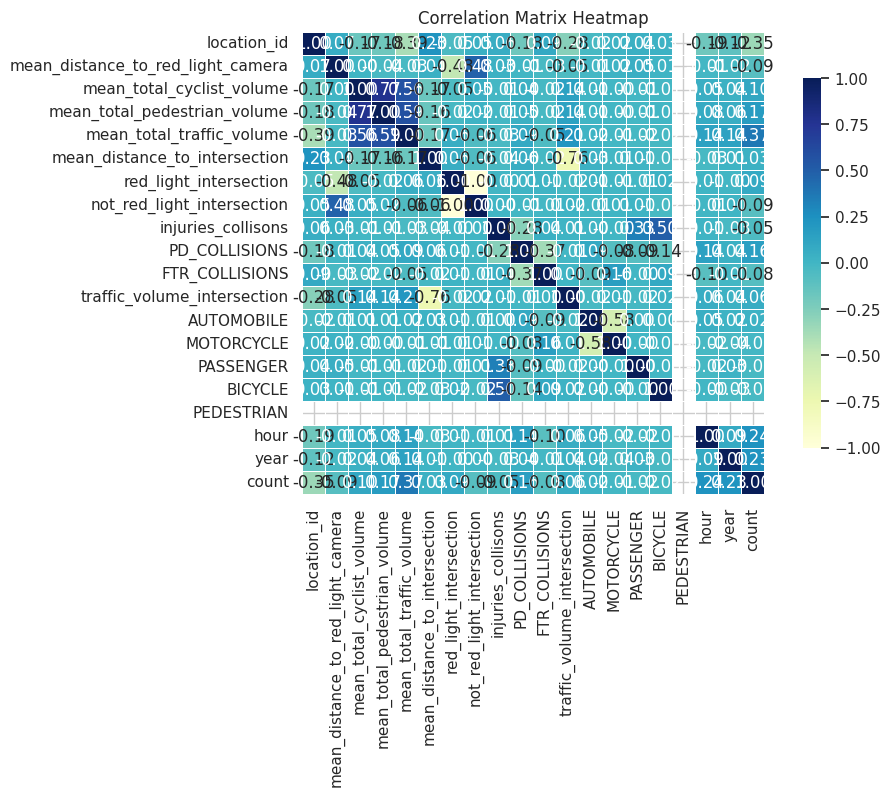

In [ ]:
correlation_matrix = combined_table.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlGnBu',#coolwarm previous
            linewidths=0.5, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
combined_table.columns

Index(['location_id', 'mean_distance_to_red_light_camera',
       'mean_total_cyclist_volume', 'mean_total_pedestrian_volume',
       'mean_total_traffic_volume', 'mean_distance_to_intersection',
       'red_light_intersection', 'not_red_light_intersection',
       'injuries_collisons', 'PD_COLLISIONS', 'FTR_COLLISIONS',
       'traffic_volume_intersection', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER',
       'BICYCLE', 'PEDESTRIAN', 'place', 'count'],
      dtype='object')

location vs traffic

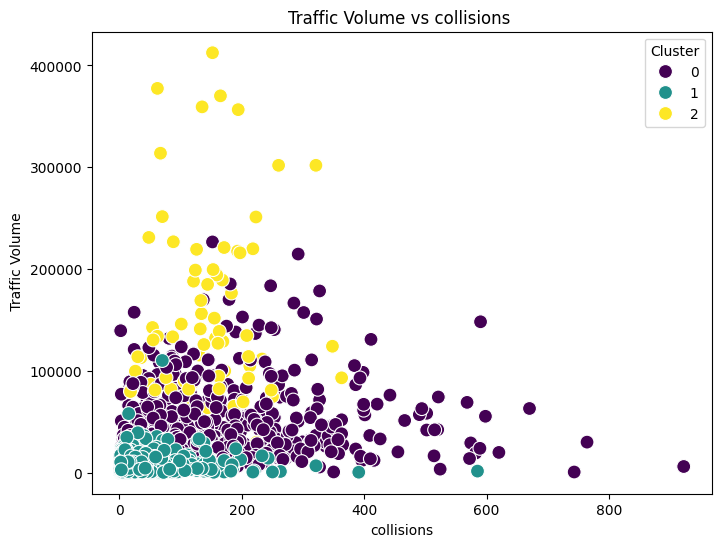

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X = combined_table[['location_id','mean_distance_to_red_light_camera',
                    'mean_total_cyclist_volume',
                    'mean_total_pedestrian_volume',
                    'mean_total_traffic_volume','mean_distance_to_intersection',
                    'count']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
silhouette_scores = []

K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
combined_table['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_table,
                x='count',
                y='mean_total_traffic_volume',
                hue='Cluster',
                palette='viridis',
                s=100)
plt.title('Traffic Volume vs collisions ')
plt.xlabel('collisions')
plt.ylabel(' Traffic Volume')
plt.legend(title='Cluster')
plt.show()


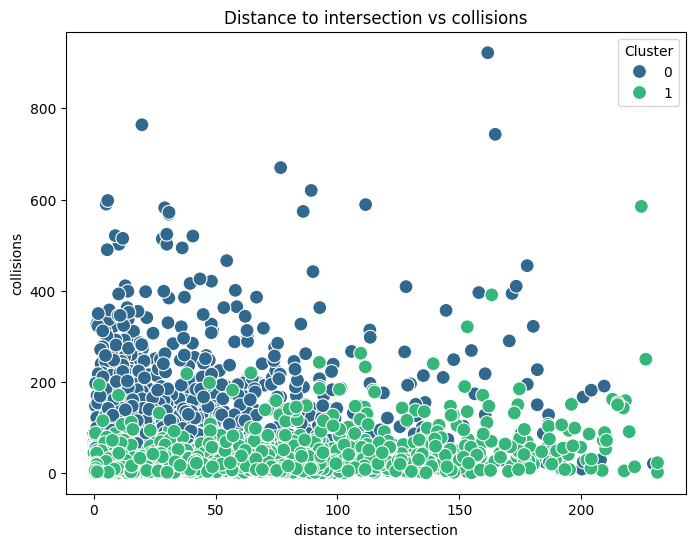

In [ ]:
X = combined_table[['location_id','mean_distance_to_red_light_camera',
                    'mean_total_cyclist_volume',
                    'mean_total_pedestrian_volume',
                    'mean_total_traffic_volume','mean_distance_to_intersection',
                    'count']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
silhouette_scores = []

K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
combined_table['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_table,
                x='mean_distance_to_intersection',
                y='count',
                hue='Cluster',
                palette='viridis',
                s=100)
plt.title('Distance to intersection vs collisions')
plt.xlabel('distance to intersection')
plt.ylabel('collisions')
plt.legend(title='Cluster')
plt.show()

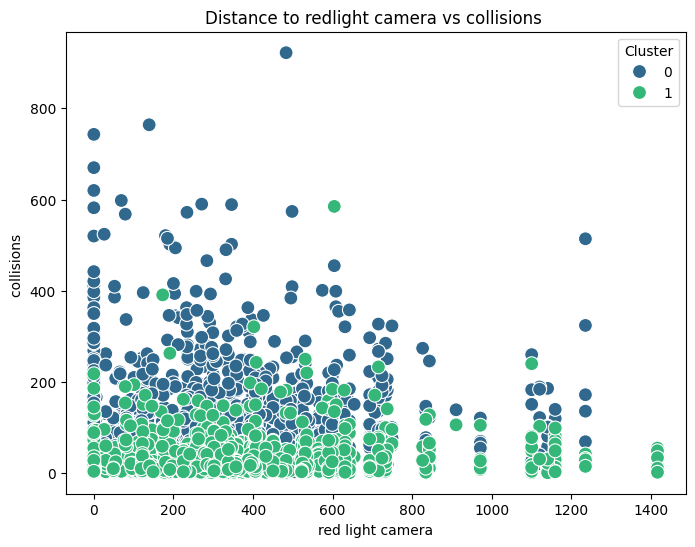

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
combined_table['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_table,
                x='mean_distance_to_red_light_camera',
                y='count',
                hue='Cluster',
                palette='viridis',
                s=100)
plt.title('Distance to redlight camera vs collisions ')
plt.xlabel('red light camera')
plt.ylabel('collisions ')
plt.legend(title='Cluster')
plt.show()


In [ ]:
filtered_table = combined_table[(combined_table['location_id'] >= 0) &
                                 (combined_table['location_id'] <= 10000)]
top_places = filtered_table['place'].value_counts().head(3)
print("Top 3 places in the range 4000 to 5000:")
print(top_places)

Top 3 places in the range 4000 to 5000:
place
West Humber-Clairville (1)      34
South Riverdale (70)            28
York University Heights (27)    27
Name: count, dtype: int64


location vs accident

In [ ]:
filtered_table = combined_table[(combined_table['location_id'] >= 0) &
                                 (combined_table['location_id'] <= 10000)]
top_places = filtered_table['place'].value_counts().head(3)
print("Top 3 places in the range 4000 to 5000:")
print(top_places)

Top 3 places in the range 4000 to 5000:
place
West Humber-Clairville (1)      34
South Riverdale (70)            28
York University Heights (27)    27
Name: count, dtype: int64


Reg - Intersection vs all

given the distance to red light, cyclist volume, traffic volume , pd collisions and count of accidents we can predict intersection

Otherwise

Intersections are the places of high pd collision, high accident rate

In [ ]:
combined_table.columns

Index(['location_id', 'mean_distance_to_red_light_camera',
       'mean_total_cyclist_volume', 'mean_total_pedestrian_volume',
       'mean_total_traffic_volume', 'mean_distance_to_intersection',
       'red_light_intersection', 'not_red_light_intersection',
       'injuries_collisons', 'PD_COLLISIONS', 'FTR_COLLISIONS',
       'traffic_volume_intersection', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER',
       'BICYCLE', 'PEDESTRIAN', 'place', 'count', 'Cluster'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
combined_table1 = combined_table.apply(pd.to_numeric, errors='coerce')
combined_table1 = combined_table1.fillna(0)

X = combined_table1.drop(columns=['location_id'])
y = combined_table1['location_id']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            location_id   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     977.0
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:38:35   Log-Likelihood:                -30932.
No. Observations:                3013   AIC:                         6.190e+04
Df Residuals:                    2996   BIC:                         6.200e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

No.of accidents vs all other variables

In [ ]:
combined_table.columns

Index(['location_id', 'mean_distance_to_red_light_camera',
       'mean_total_cyclist_volume', 'mean_total_pedestrian_volume',
       'mean_total_traffic_volume', 'mean_distance_to_intersection',
       'red_light_intersection', 'not_red_light_intersection',
       'injuries_collisons', 'PD_COLLISIONS', 'FTR_COLLISIONS',
       'traffic_volume_intersection', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER',
       'BICYCLE', 'PEDESTRIAN', 'place', 'count', 'Cluster'],
      dtype='object')

No.of accidents or count vs traffic and others

In [ ]:
import statsmodels.api as sm
combined_table2 = combined_table.apply(pd.to_numeric, errors='coerce')
combined_table2 = combined_table2.fillna(0)
label_encoder = LabelEncoder()
combined_table2['month'] = label_encoder.fit_transform(combined_table['month'])
combined_table2['day'] = label_encoder.fit_transform(combined_table['day'])
X = combined_table2.drop(columns=['count','injuries_collisons','FTR_COLLISIONS','AUTOMOBILE',
       'MOTORCYCLE', 'PASSENGER', 'BICYCLE'])
y = combined_table2['count']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     78.16
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          8.49e-202
Time:                        03:25:39   Log-Likelihood:                -17162.
No. Observations:                3013   AIC:                         3.436e+04
Df Residuals:                    2997   BIC:                         3.445e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

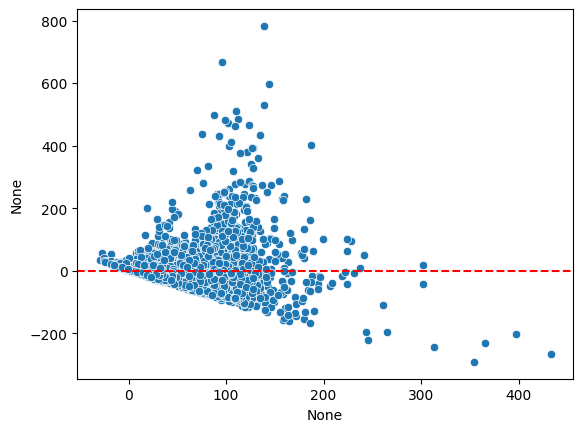

In [ ]:
predictions = model.predict(X)
residuals = model.resid
sns.scatterplot(x=predictions,y=residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.show()

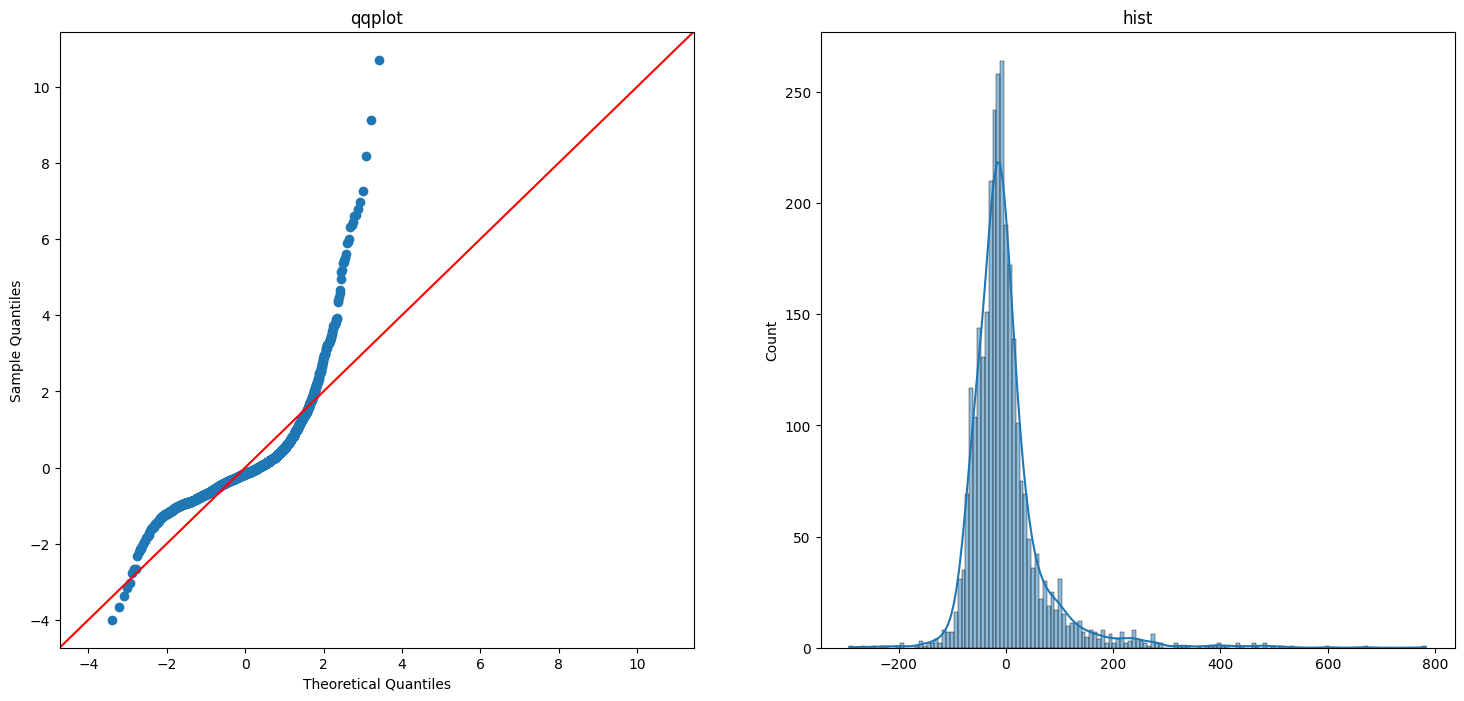

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sm.qqplot(residuals,line='45',fit=True,ax=ax[0])
ax[0].set_title("qqplot")
sns.histplot(residuals,kde=True,ax=ax[1])
ax[1].set_title("hist")
plt.show()

In [ ]:
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split

combined_table2 = combined_table.apply(pd.to_numeric, errors='coerce')
combined_table2 = combined_table2.fillna(0)

combined_table2['mean_total_traffic_volume'] = combined_table2['mean_total_traffic_volume']**2
combined_table2['log_total_traffic_volume'] = np.log1p(combined_table2['mean_total_traffic_volume'])

X = combined_table2.drop(columns=['count'])
y = combined_table2['count']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     52.02
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          1.61e-191
Time:                        03:25:49   Log-Likelihood:                -17172.
No. Observations:                3013   AIC:                         3.439e+04
Df Residuals:                    2990   BIC:                         3.453e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
import statsmodels.api as sm

combined_table2 = combined_table.apply(pd.to_numeric, errors='coerce')
combined_table2 = combined_table2.fillna(0)

X = combined_table2.drop(columns=['count'])
y = combined_table2['count']

X_sm = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

ridge_cv_scores = cross_val_score(ridge, X, y, cv=5)
lasso_cv_scores = cross_val_score(lasso, X, y, cv=5)

print("Ridge Regression Cross-Validated R² Scores:", ridge_cv_scores)
print("Average R² for Ridge:", ridge_cv_scores.mean())

print("Lasso Regression Cross-Validated R² Scores:", lasso_cv_scores)
print("Average R² for Lasso:", lasso_cv_scores.mean())

ols_model = sm.OLS(y, X_sm).fit()
print(ols_model.summary())


Ridge Regression Cross-Validated R² Scores: [-0.01066857  0.108909   -0.12371139  0.15128313  0.19051736]
Average R² for Ridge: 0.06326590595370421
Lasso Regression Cross-Validated R² Scores: [-0.01163729  0.10801235 -0.11295351  0.16043592  0.18613266]
Average R² for Lasso: 0.06599802490511138
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     65.63
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          9.29e-182
Time:                        23:38:40   Log-Likelihood:                -17207.
No. Observations:                3013   AIC:                         3.445e+04
Df Residuals:                    2996   BIC:                         3.455e+04
Df Model:                          16                                   

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


can predict the neighbourhood accuratly ,given :

['location_id', 'mean_distance_to_red_light_camera',
       'mean_total_cyclist_volume', 'mean_total_pedestrian_volume',
       'mean_total_traffic_volume']

other words- some neighbourhood have high cyclist volume,pedetrian volume,traffic volume

In [ ]:
label_encoder = LabelEncoder()
combined_table['place_encoded'] = label_encoder.fit_transform(combined_table['place'])

combined_table = combined_table.fillna(0)
X = combined_table.drop(columns=['place','location_id'])
y = combined_table['place_encoded']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          place_encoded   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.227e+30
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:38:40   Log-Likelihood:                 82638.
No. Observations:                3013   AIC:                        -1.652e+05
Df Residuals:                    2995   BIC:                        -1.651e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [ ]:
# red vs all
#  and non red light vs all

X = combined_table.drop(columns=['mean_total_traffic_volume','place'])
y = combined_table['mean_total_traffic_volume']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     mean_total_traffic_volume   R-squared:                       0.504
Model:                                   OLS   Adj. R-squared:                  0.501
Method:                        Least Squares   F-statistic:                     179.1
Date:                       Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                               23:38:40   Log-Likelihood:                -34630.
No. Observations:                       3013   AIC:                         6.930e+04
Df Residuals:                           2995   BIC:                         6.941e+04
Df Model:                                 17                                         
Covariance Type:                   nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

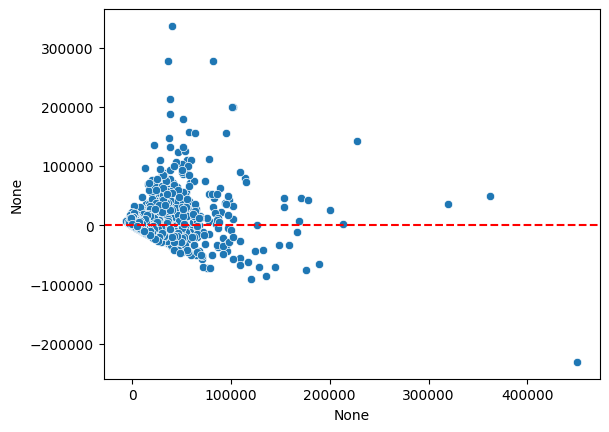

In [ ]:
predictions = model.predict(X)
residuals = model.resid
sns.scatterplot(x=predictions,y=residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.show()

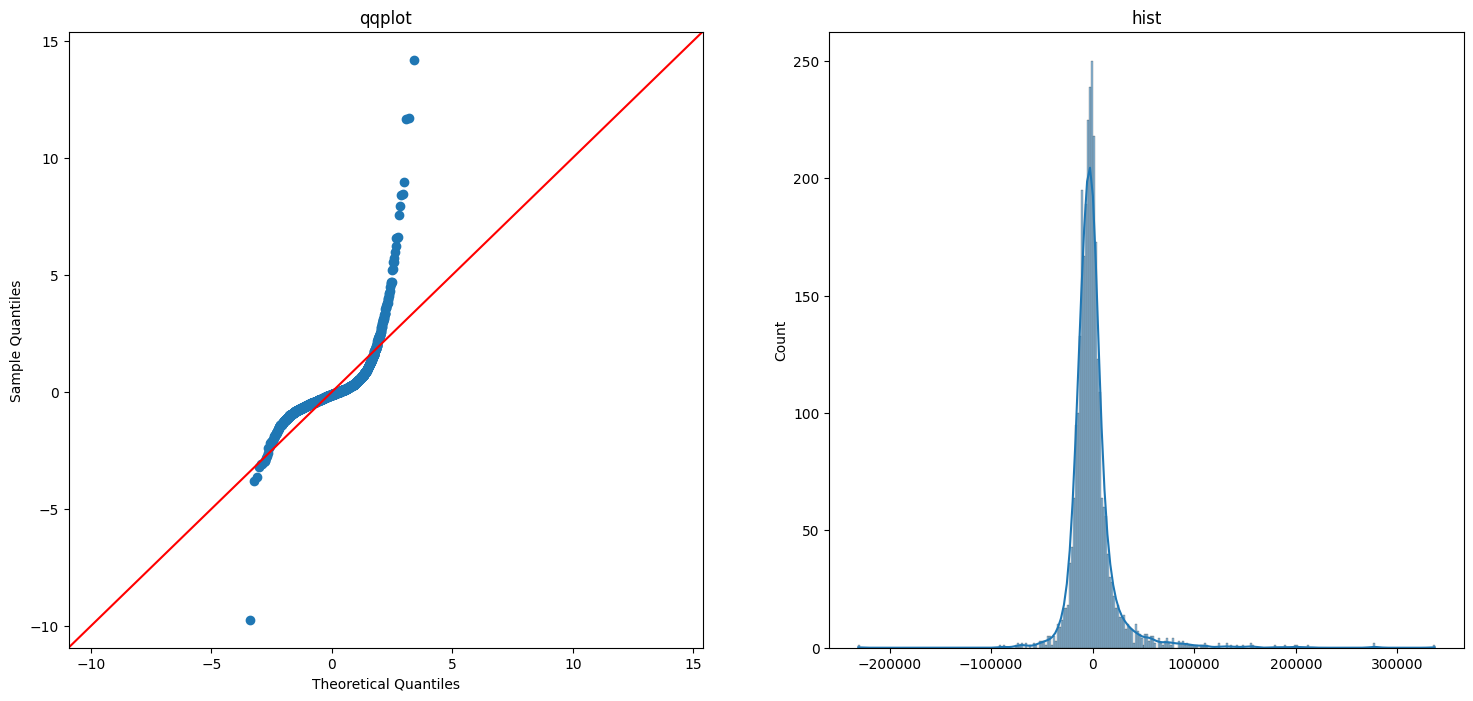

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sm.qqplot(residuals,line='45',fit=True,ax=ax[0])
ax[0].set_title("qqplot")
sns.histplot(residuals,kde=True,ax=ax[1])
ax[1].set_title("hist")
plt.show()


clustering

In [ ]:
combined_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   location_id                        3013 non-null   int64  
 1   mean_distance_to_red_light_camera  3013 non-null   float64
 2   mean_total_cyclist_volume          3013 non-null   float64
 3   mean_total_pedestrian_volume       3013 non-null   float64
 4   mean_total_traffic_volume          3013 non-null   float64
 5   mean_distance_to_intersection      3013 non-null   float64
 6   red_light_intersection             3013 non-null   int64  
 7   not_red_light_intersection         3013 non-null   int64  
 8   injuries_collisons                 3013 non-null   float64
 9   PD_COLLISIONS                      3013 non-null   float64
 10  FTR_COLLISIONS                     3013 non-null   float64
 11  traffic_volume_intersection        3013 non-null   int64

In [ ]:
 #PD Collision (Property Damage Collision)
# FTR Collision (Fail-to-Remain Collision):This refers to a "Hit-and-Run"

charts and grsphs

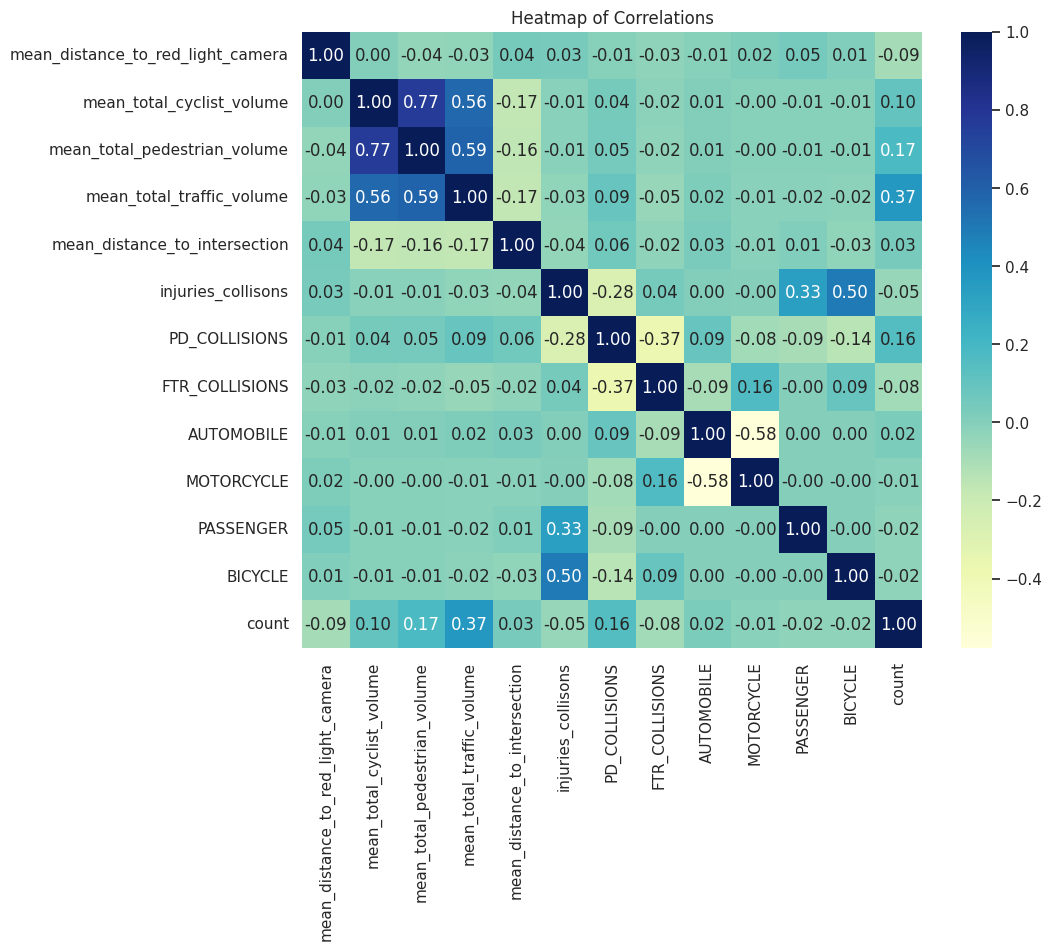

In [ ]:
numeric_columns = combined_table[['mean_distance_to_red_light_camera', 'mean_total_cyclist_volume',
                                  'mean_total_pedestrian_volume', 'mean_total_traffic_volume',
                                  'mean_distance_to_intersection', 'injuries_collisons',
                                  'PD_COLLISIONS', 'FTR_COLLISIONS', 'AUTOMOBILE',
                                  'MOTORCYCLE', 'PASSENGER', 'BICYCLE','count']]


corr_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()


In [ ]:
top_places = combined_table.groupby('place')['count'].sum().nlargest(10).index
filtered_combined_table = combined_table[combined_table['place'].isin(top_places)]


<ipython-input-71-cec24b887387>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='count', x='place', data=filtered_combined_table, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to

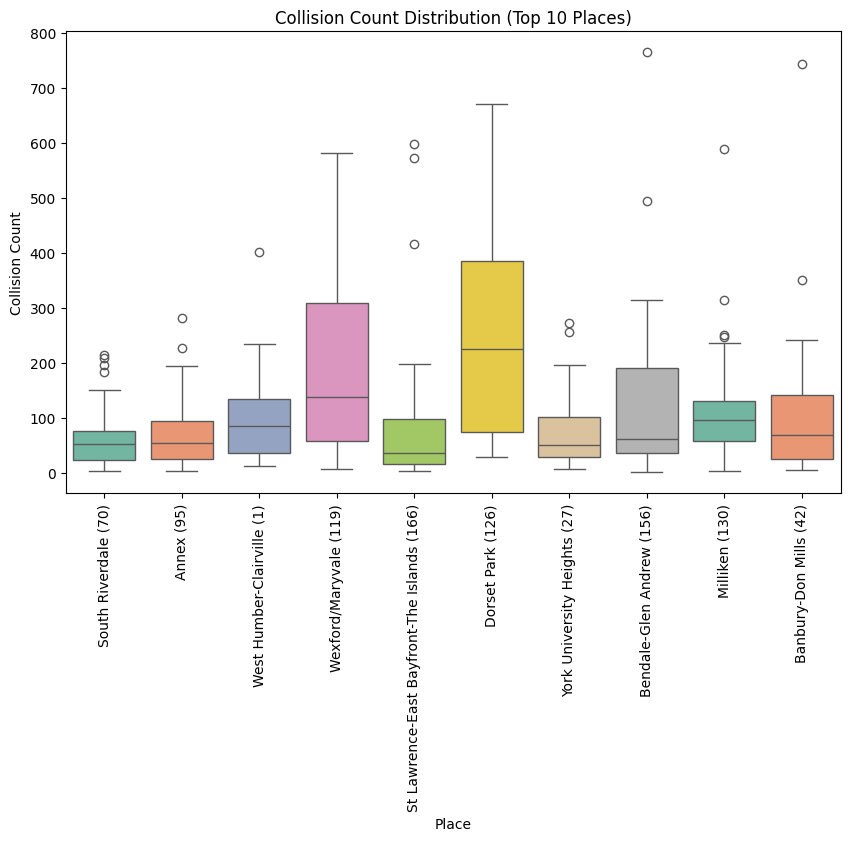

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='count', x='place', data=filtered_combined_table, palette='Set2')
plt.title('Collision Count Distribution (Top 10 Places)')
plt.ylabel('Collision Count')
plt.xlabel('Place')
plt.xticks(rotation=90)
plt.show()


<ipython-input-72-b455c64c3c8c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='place', y='mean_total_traffic_volume', data=filtered_combined_table, palette='viridis', estimator='mean')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn

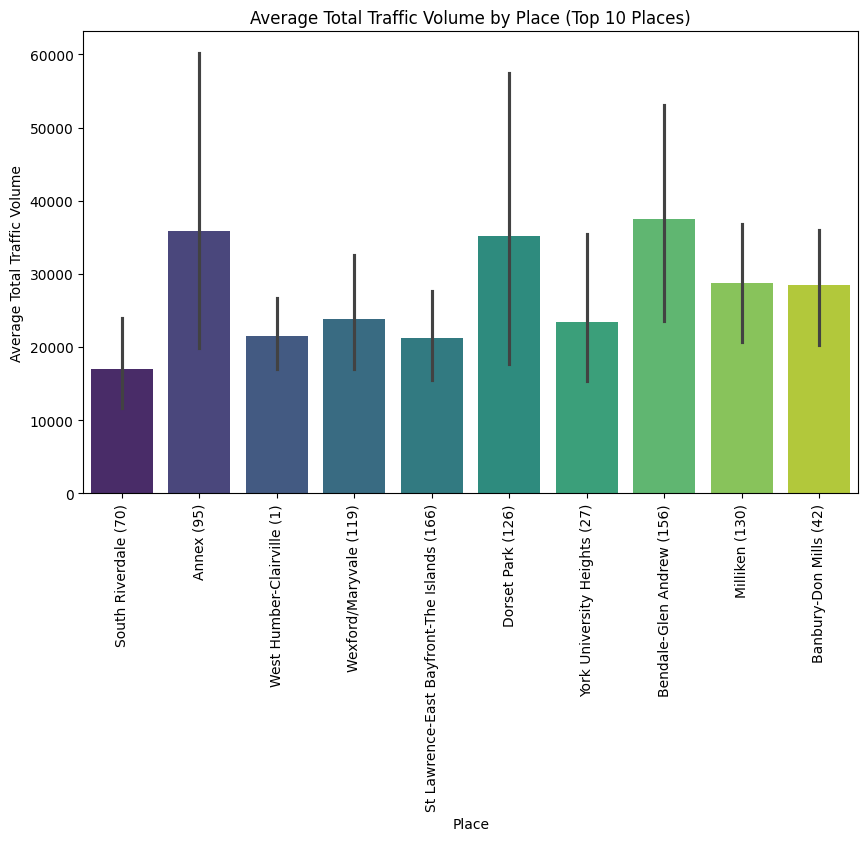

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='place', y='mean_total_traffic_volume', data=filtered_combined_table, palette='viridis', estimator='mean')
plt.title('Average Total Traffic Volume by Place (Top 10 Places)')
plt.xlabel('Place')
plt.ylabel('Average Total Traffic Volume')
plt.xticks(rotation=90)
plt.show()


<ipython-input-73-544fe9c78b15>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='place', data=filtered_combined_table, palette='muted')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with 

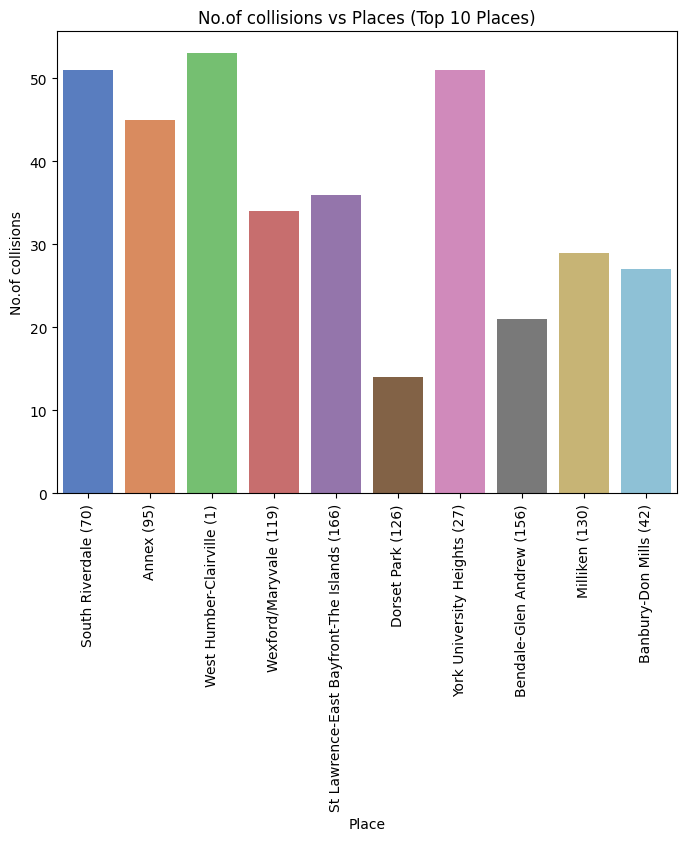

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='place', data=filtered_combined_table, palette='muted')
plt.title('No.of collisions vs Places (Top 10 Places)')
plt.xlabel('Place')
plt.ylabel('No.of collisions')
plt.xticks(rotation=90)
plt.show()


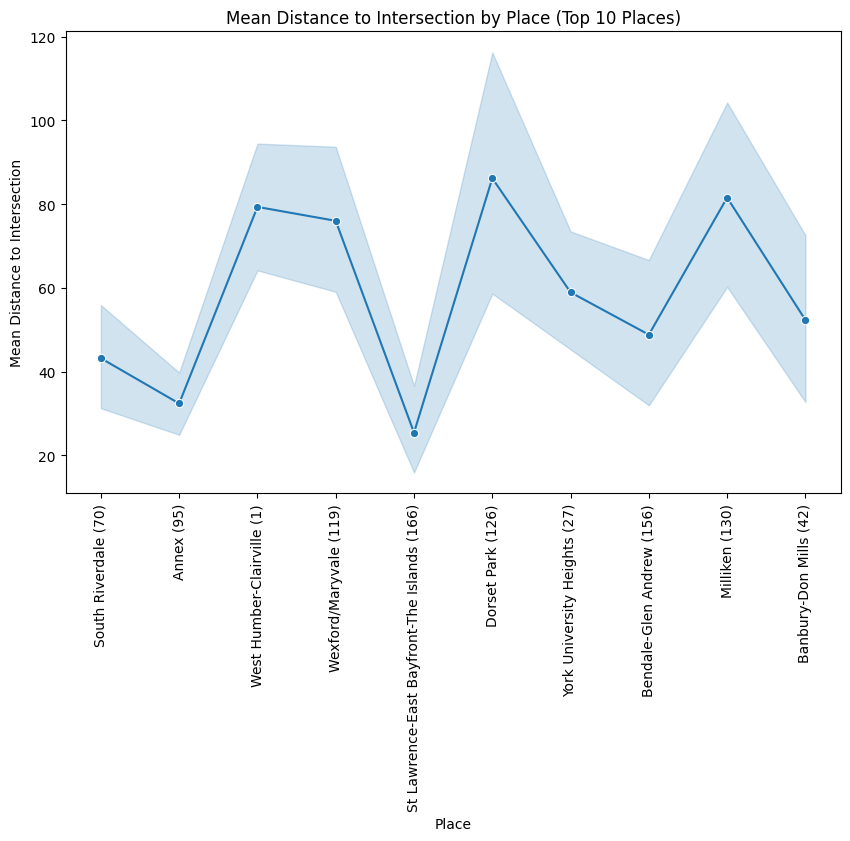

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='place', y='mean_distance_to_intersection', data=filtered_combined_table, marker='o')
plt.title('Mean Distance to Intersection by Place (Top 10 Places)')
plt.xlabel('Place')
plt.ylabel('Mean Distance to Intersection')
plt.xticks(rotation=90)
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go

cluster_data = combined_table[['mean_total_traffic_volume', 'count', 'mean_distance_to_intersection']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=3, random_state=42)
combined_table['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
import plotly.graph_objs as go

hover_text = (
    'Traffic Volume: ' + combined_table['mean_total_traffic_volume'].astype(str) + '<br>' +
    'Collision Count: ' + combined_table['count'].astype(str) + '<br>' +
    'Distance to Intersection: ' + combined_table['mean_distance_to_intersection'].astype(str)
)

fig = go.Figure(data=[go.Scatter3d(
    x=combined_table['mean_total_traffic_volume'],
    y=combined_table['count'],
    z=combined_table['mean_distance_to_intersection'],
    mode='markers',
    marker=dict(
        size=5,
        color=combined_table['Cluster'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=hover_text,
    hoverinfo='text'
)])

fig.update_layout(
    title='Cluster Analysis: Traffic Volume vs Collision Count vs Distance to Intersection',
    scene=dict(
        xaxis_title='Traffic Volume',
        yaxis_title='Collision Count',
        zaxis_title='Distance to Intersection'
    )
)

fig.show()


In [ ]:
import plotly.graph_objs as go

hover_text = (
    'Traffic Volume: ' + combined_table['mean_total_traffic_volume'].astype(str) + '<br>' +
    'Collision Count: ' + combined_table['count'].astype(str) + '<br>' +
    'Distance to Red Light Camera: ' + combined_table['mean_distance_to_red_light_camera'].astype(str)
)

fig = go.Figure(data=[go.Scatter3d(
    x=combined_table['mean_total_traffic_volume'],
    y=combined_table['count'],
    z=combined_table['mean_distance_to_red_light_camera'],
    mode='markers',
    marker=dict(
        size=5,
        color=combined_table['Cluster'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=hover_text,
    hoverinfo='text'
)])

fig.update_layout(
    title='Cluster Analysis: Traffic Volume vs Collision Count vs Distance to Red Light Camera',
    scene=dict(
        xaxis_title='Traffic Volume',
        yaxis_title='Collision Count',
        zaxis_title='Distance to RedLightCamera'
    )
)

fig.show()


In [ ]:
combined_table['place'].nunique()

158

#Check from here

<ipython-input-113-627022c0697a>:13: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



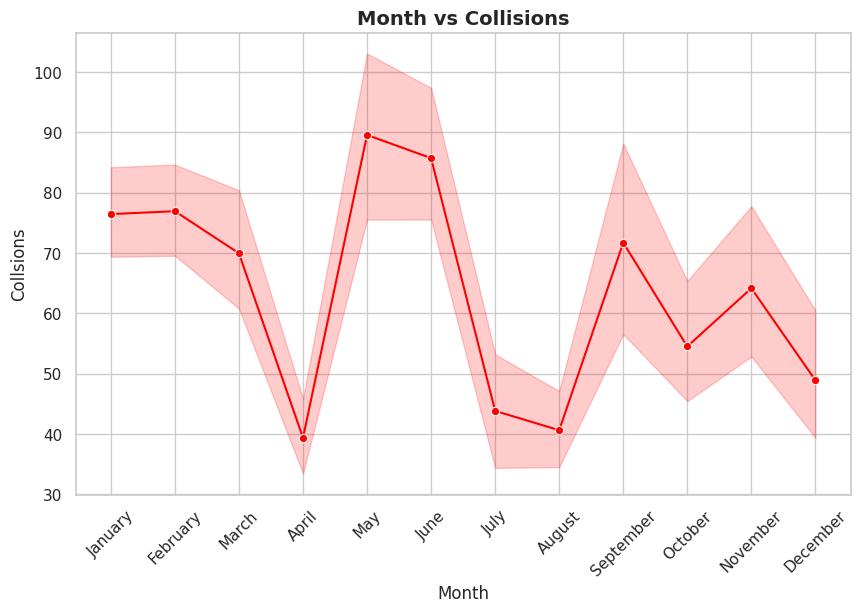

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
combined_table['month'] = pd.Categorical(combined_table['month'], categories=month_order, ordered=True)

combined_table = combined_table.sort_values('month')

palette = sns.color_palette("husl", len(month_order))

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='count', data=combined_table, marker='o', palette=palette, color='red')

plt.title('Month vs Collisions', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Collsions', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-111-2e26ff7ef25c>:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



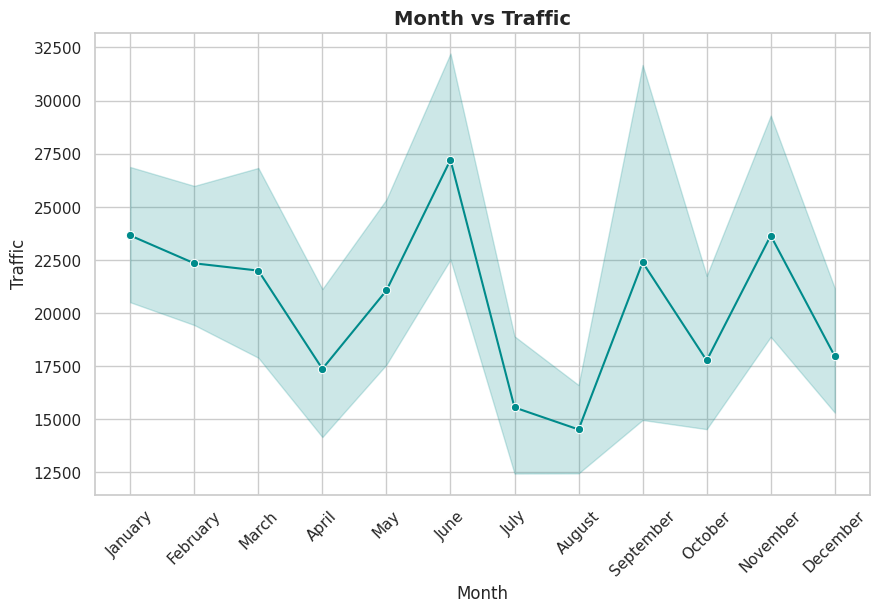

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
combined_table['month'] = pd.Categorical(combined_table['month'], categories=month_order, ordered=True)

combined_table = combined_table.sort_values('month')

palette = sns.color_palette("husl", len(month_order))

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='mean_total_traffic_volume', data=combined_table, marker='o', palette=palette, color='darkcyan')

plt.title('Month vs Traffic', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Traffic', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-114-4dfe4e2f4560>:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



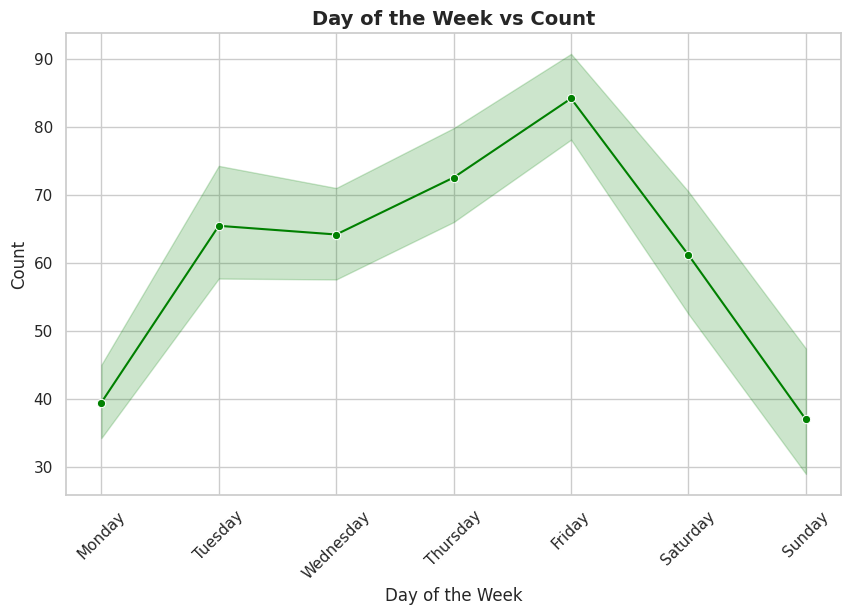

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

combined_table['day'] = pd.Categorical(combined_table['day'], categories=day_order, ordered=True)
combined_table = combined_table.sort_values('day')
palette = sns.color_palette("coolwarm", len(day_order))
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='count', data=combined_table, marker='o', palette=palette, color='green')
plt.title('Day of the Week vs Count', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-108-06e47f419f2a>:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



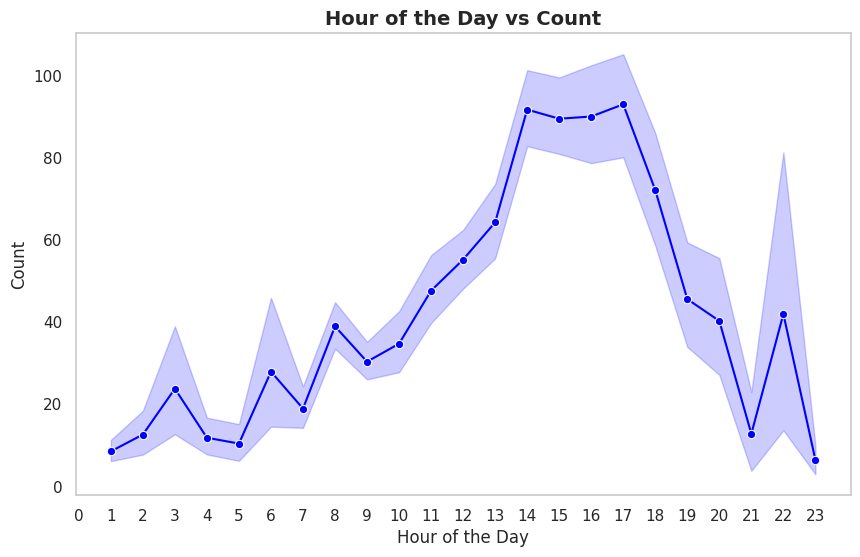

In [ ]:
hour_order = list(range(24))
combined_table['hour'] = pd.Categorical(combined_table['hour'], categories=hour_order, ordered=True)
combined_table = combined_table.sort_values('hour')

palette = sns.color_palette("viridis", len(hour_order))

plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count', data=combined_table, marker='o', palette=palette, color='blue')

plt.title('Hour of the Day vs Count', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(hour_order)

plt.grid(False)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

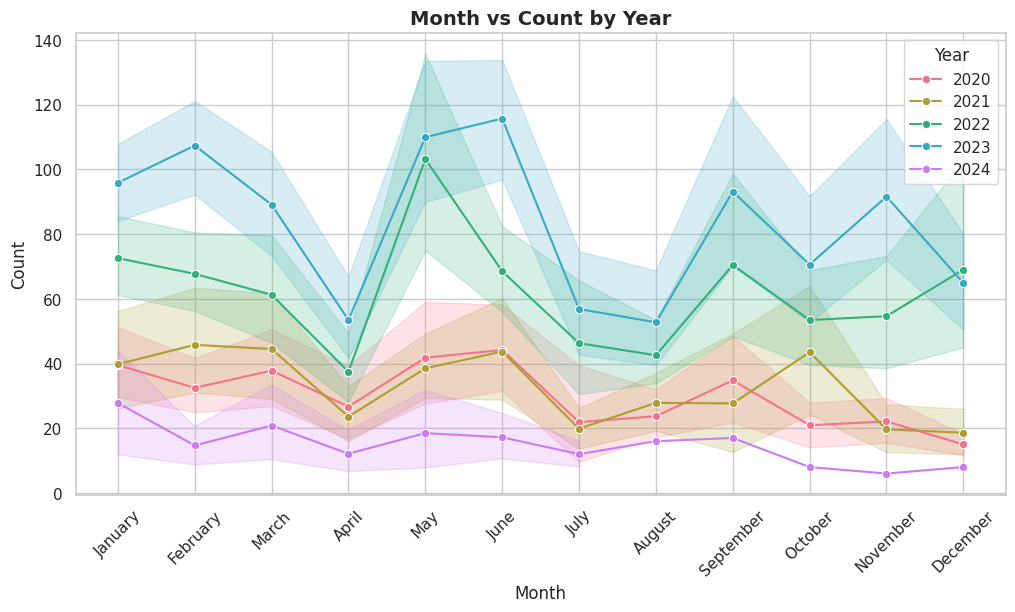

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

combined_table['month'] = pd.Categorical(combined_table['month'], categories=month_order, ordered=True)

combined_table = combined_table.sort_values(['year', 'month'])

palette = sns.color_palette("husl", len(combined_table['year'].unique()))

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='count', data=combined_table, marker='o', hue='year', palette=palette)

plt.title('Month vs Count by Year', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.grid(True)
plt.legend(title='Year')
plt.show()


<ipython-input-105-2cb42e084119>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When gr

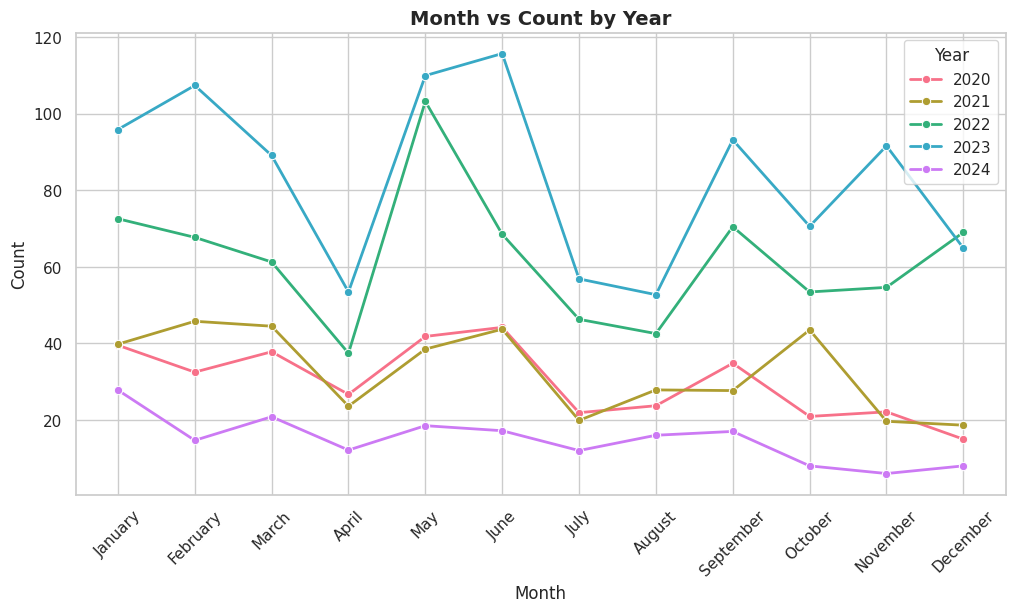

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
combined_table['month'] = pd.Categorical(combined_table['month'], categories=month_order, ordered=True)
combined_table = combined_table.sort_values(['year', 'month'])
palette = sns.color_palette("husl", len(combined_table['year'].unique()))

plt.figure(figsize=(12, 6))

sns.lineplot(x='month', y='count', data=combined_table, marker='o', hue='year',
             palette=palette, linewidth=2, ci=None)
plt.title('Month vs Count by Year', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.grid(True)
plt.legend(title='Year')
plt.show()


<ipython-input-115-5db2c8097915>:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When gro

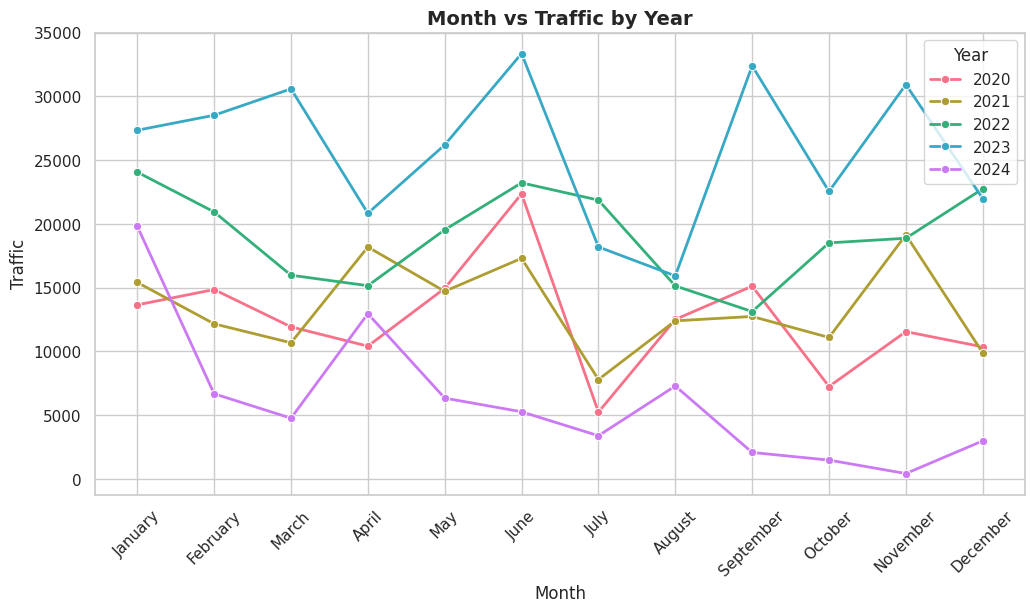

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
combined_table['month'] = pd.Categorical(combined_table['month'], categories=month_order, ordered=True)
combined_table = combined_table.sort_values(['year', 'month'])
palette = sns.color_palette("husl", len(combined_table['year'].unique()))

plt.figure(figsize=(12, 6))

sns.lineplot(x='month', y='mean_total_traffic_volume', data=combined_table, marker='o', hue='year',
             palette=palette, linewidth=2, ci=None)
plt.title('Month vs Traffic by Year', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Traffic', fontsize=12)
plt.xticks(rotation=45)

plt.grid(True)
plt.legend(title='Year')
plt.show()


<ipython-input-116-87f1bd7ee736>:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



<Axes: xlabel='day', ylabel='hour'>

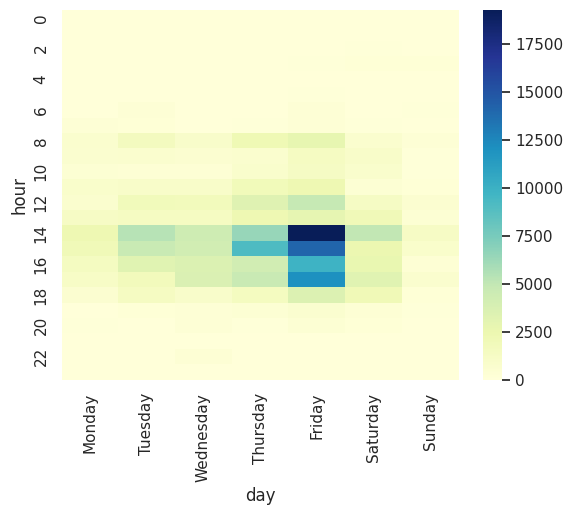

In [ ]:
pivot = combined_table.pivot_table(values='count', index='hour', columns='day', aggfunc='sum')
sns.heatmap(pivot, cmap='YlGnBu')


<Axes: xlabel='month', ylabel='mean_total_traffic_volume'>

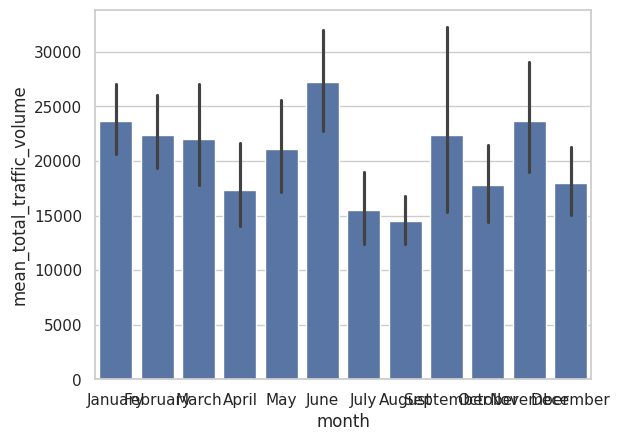

In [ ]:
sns.barplot(x='month', y='mean_total_traffic_volume', data=combined_table)

In [ ]:
combined_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3013 entries, 2416 to 1652
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   location_id                        3013 non-null   int64   
 1   mean_distance_to_red_light_camera  3013 non-null   float64 
 2   mean_total_cyclist_volume          3013 non-null   float64 
 3   mean_total_pedestrian_volume       3013 non-null   float64 
 4   mean_total_traffic_volume          3013 non-null   float64 
 5   mean_distance_to_intersection      3013 non-null   float64 
 6   red_light_intersection             3013 non-null   int64   
 7   not_red_light_intersection         3013 non-null   int64   
 8   injuries_collisons                 3013 non-null   float64 
 9   PD_COLLISIONS                      3013 non-null   float64 
 10  FTR_COLLISIONS                     3013 non-null   float64 
 11  traffic_volume_intersection        3013 non-n

<ipython-input-131-78473456e7f8>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

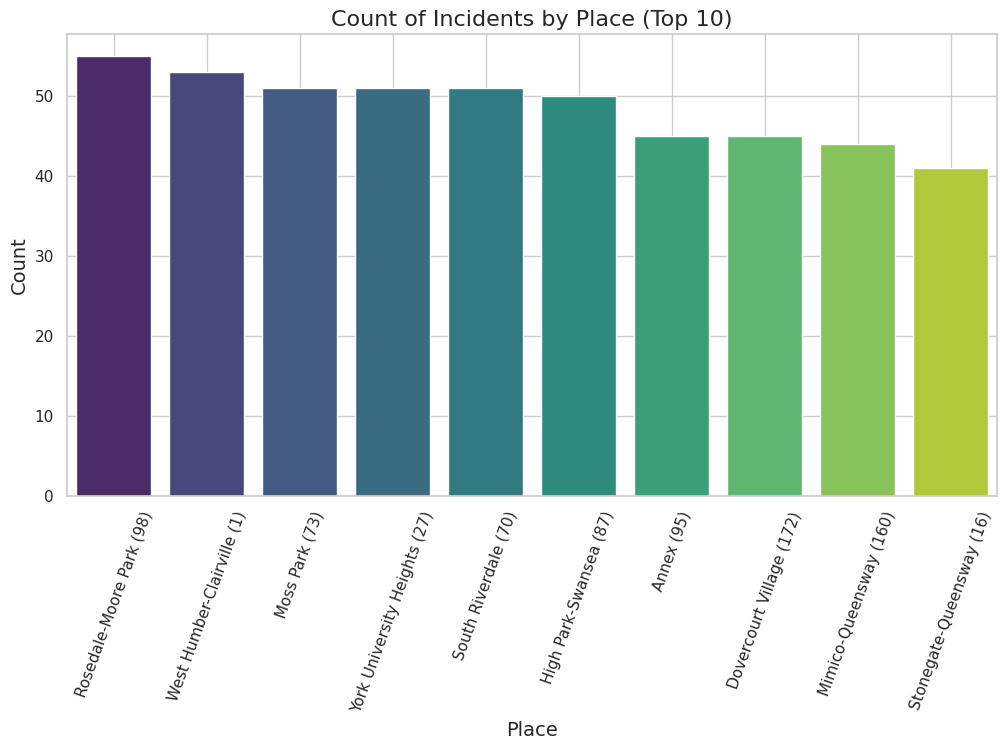

In [ ]:
top_places = combined_table['place'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_table[combined_table['place'].isin(top_places)],
               x='place',
               order=top_places,
               palette='viridis')
plt.title('Count of Incidents by Place (Top 10)', fontsize=16)
plt.xlabel('Place', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=70)
plt.grid(True)
plt.show()


In [ ]:
g = sns.FacetGrid(combined_table, col='place', hue='red_light_intersection', height=4, aspect=1)
g.map(sns.histplot, 'count', bins=30, kde=False)
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Count of Incidents by Place and Red Light Intersection')
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7c1114fbcee0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7c1114fbc160> (for post_execute):


KeyboardInterrupt: 

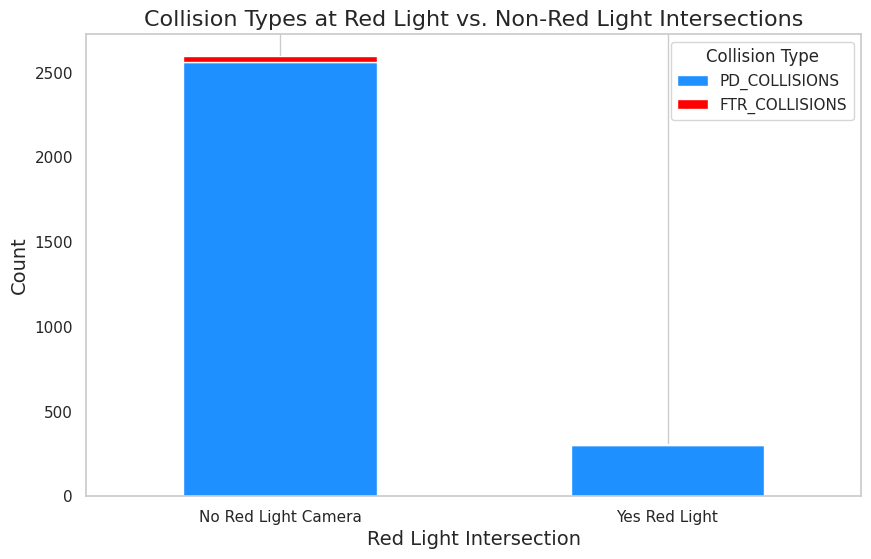

In [ ]:
import matplotlib.pyplot as plt
injury_data = combined_table.groupby('red_light_intersection')[['PD_COLLISIONS', 'FTR_COLLISIONS']].sum()
ax = injury_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['dodgerblue', 'red'])

plt.title('Collision Types at Red Light vs. Non-Red Light Intersections', fontsize=16)
plt.xlabel('Red Light Intersection', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks([0, 1], ['No Red Light Camera', 'Yes Red Light'], rotation=0)
plt.legend(title='Collision Type', labels=['PD_COLLISIONS', 'FTR_COLLISIONS'])
plt.grid(axis='y')
plt.show()



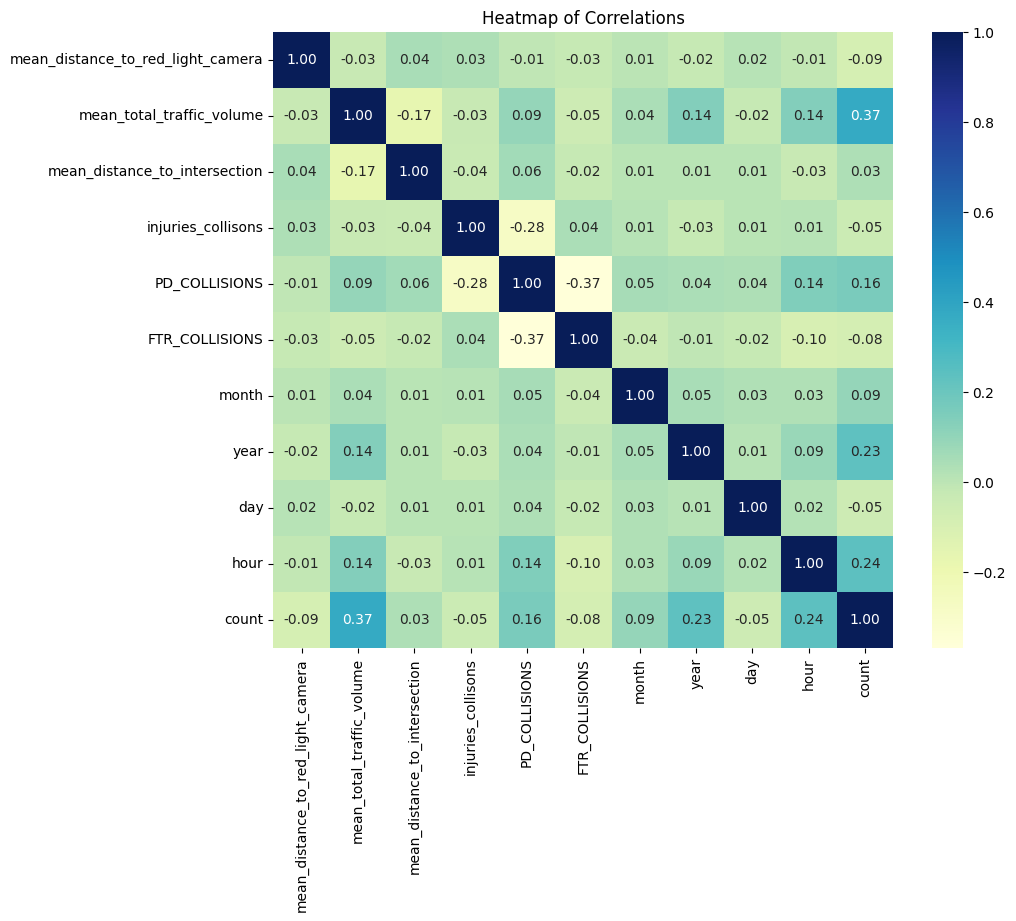

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

numeric_columns = combined_table[['mean_distance_to_red_light_camera', 'mean_total_traffic_volume',
                                  'mean_distance_to_intersection', 'injuries_collisons',
                                  'PD_COLLISIONS', 'FTR_COLLISIONS', 'month',
                                  'year', 'day','hour' ,'count']]
label_encoder = LabelEncoder()
combined_table['year'] = label_encoder.fit_transform(combined_table['year'])
combined_table['month'] = label_encoder.fit_transform(combined_table['month'])
combined_table['day'] = label_encoder.fit_transform(combined_table['day'])
corr_matrix = combined_table[numeric_columns.columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()

###NN

In [ ]:
combined_table.columns

Index(['location_id', 'mean_distance_to_red_light_camera',
       'mean_total_cyclist_volume', 'mean_total_pedestrian_volume',
       'mean_total_traffic_volume', 'mean_distance_to_intersection',
       'red_light_intersection', 'not_red_light_intersection',
       'injuries_collisons', 'PD_COLLISIONS', 'FTR_COLLISIONS',
       'traffic_volume_intersection', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER',
       'BICYCLE', 'PEDESTRIAN', 'month', 'day', 'hour', 'year', 'place',
       'count'],
      dtype='object')

In [ ]:
combined_table["place"]=label_encoder.fit_transform(combined_table["place"])

In [ ]:
combined_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   location_id                        3013 non-null   int64  
 1   mean_distance_to_red_light_camera  3013 non-null   float64
 2   mean_total_cyclist_volume          3013 non-null   float64
 3   mean_total_pedestrian_volume       3013 non-null   float64
 4   mean_total_traffic_volume          3013 non-null   float64
 5   mean_distance_to_intersection      3013 non-null   float64
 6   red_light_intersection             3013 non-null   int64  
 7   not_red_light_intersection         3013 non-null   int64  
 8   injuries_collisons                 3013 non-null   float64
 9   PD_COLLISIONS                      3013 non-null   float64
 10  FTR_COLLISIONS                     3013 non-null   float64
 11  traffic_volume_intersection        3013 non-null   int64

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


features = ['location_id', 'mean_distance_to_red_light_camera',
       'mean_total_cyclist_volume', 'mean_total_pedestrian_volume',
       'mean_total_traffic_volume', 'mean_distance_to_intersection',
       'red_light_intersection', 'not_red_light_intersection',
       'injuries_collisons', 'PD_COLLISIONS', 'FTR_COLLISIONS',
       'traffic_volume_intersection', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER',
       'BICYCLE', 'PEDESTRIAN', 'month', 'day', 'hour', 'year', 'place']

target = 'count'

X = combined_table[features]
y = combined_table[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 681 (2.66 KB)

 Trainable params: 681 (2.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13975.1680 - val_loss: 10117.5723
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12247.9639 - val_loss: 9774.0889
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11481.7520 - val_loss: 9129.4199
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10573.5527 - val_loss: 7992.8159
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11633.8906 - val_loss: 6554.5234
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7751.3276 - val_loss: 5260.3813
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5588.7339 - val_loss: 4481.7246
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6003.1216 - val_loss: 4150.2075
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6811.5923 - val_loss: 3984.5503
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6757.4829 - val_loss: 3905.4233
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6180.3901 - val_loss: 3844.8577
Ep

In [ ]:
loss= model.evaluate(X_test, y_test)
print('Mean Squared Error on Test Data:', loss)
y_pred = model.predict(X_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4470.1685 
Mean Squared Error on Test Data: 4961.8359375
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('R² on Training Data:', "{:.4f}".format(r2_train))
print('R² on Testing Data:' ,"{:.4f}".format(r2_test))




76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R² on Training Data: 0.3478
R² on Testing Data: 0.2209


## RF

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')
plt.title('Predicted vs Actual Collision Count')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
combined_table["month"]=label_encoder.fit_transform(combined_table["month"])
combined_table["day"]=label_encoder.fit_transform(combined_table["day"])

X = combined_table.drop(columns=['count'])
y = combined_table['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"R² (Train): {r2_train:.4f}")
print(f"R² (Test): {r2_test:.4f}")
print(f"MSE (Train): {mse_train:.0f}")
print(f"MSE (Test): {mse_test:.0f}")


R² (Train): 0.9159
R² (Test): 0.3202
MSE (Train): 625
MSE (Test): 4330


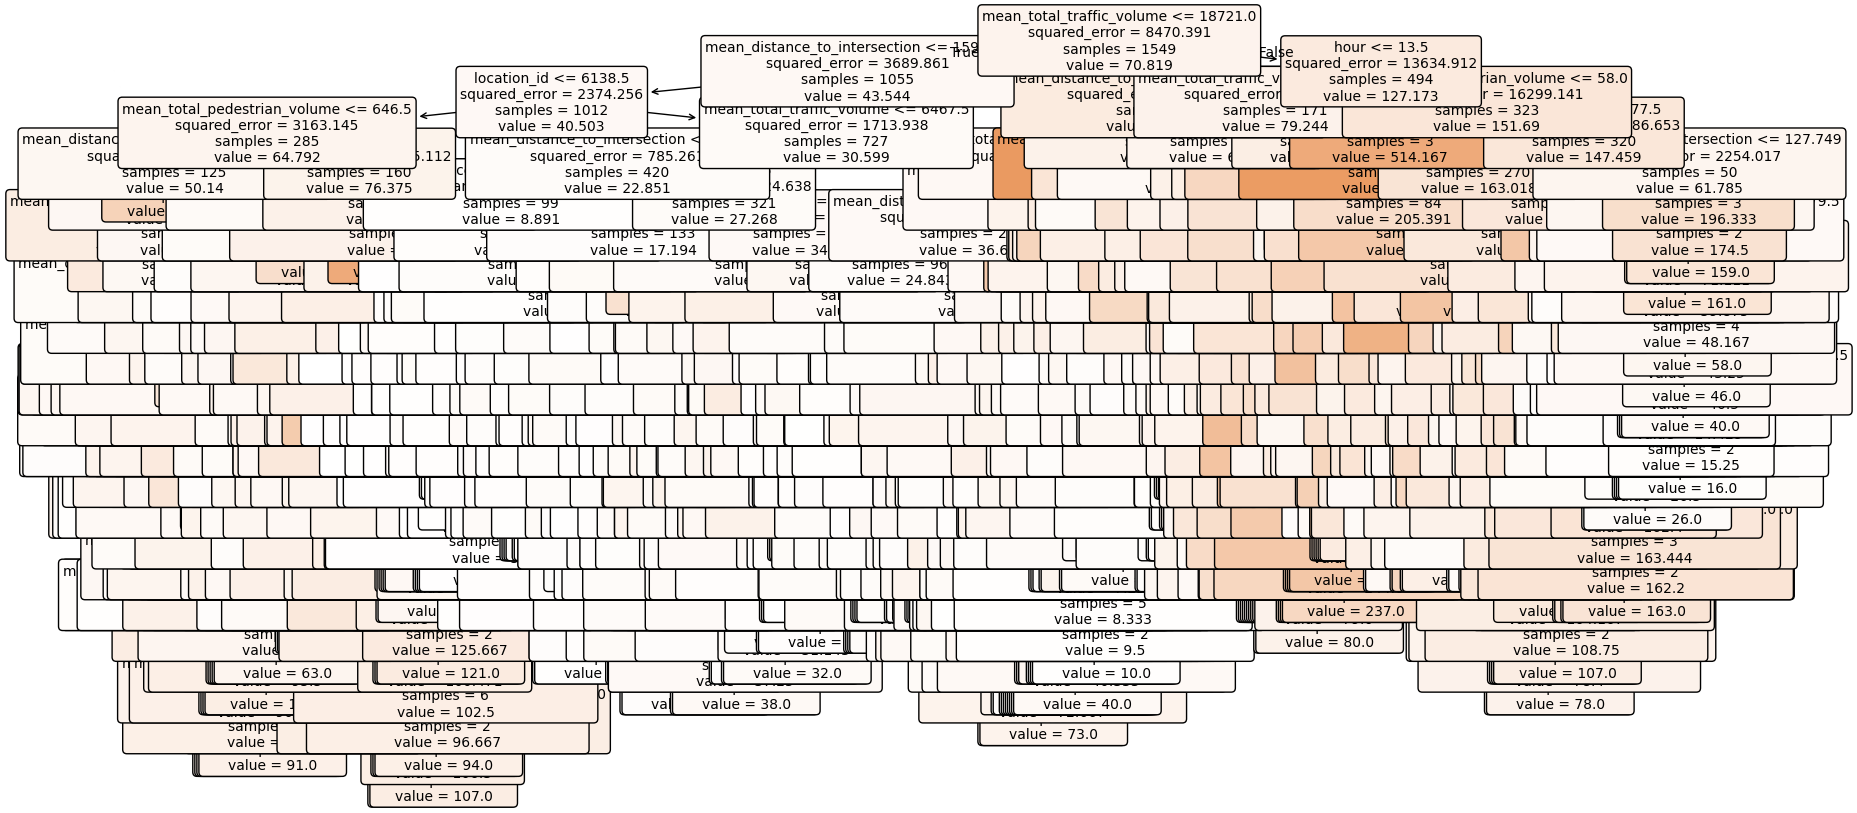

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
tree = rf_model.estimators_[0]
plt.figure(figsize=(20, 10))

plot_tree(tree,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)

plt.show()


###improving LR

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
combined_table["month"] = label_encoder.fit_transform(combined_table["month"])
combined_table["day"] = label_encoder.fit_transform(combined_table["day"])

X = combined_table.drop(columns=['count'])
y = combined_table['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)

y_pred_train_gbm = gbm_model.predict(X_train)
y_pred_test_gbm = gbm_model.predict(X_test)

r2_train_gbm = r2_score(y_train, y_pred_train_gbm)
r2_test_gbm = r2_score(y_test, y_pred_test_gbm)
mse_train_gbm = mean_squared_error(y_train, y_pred_train_gbm)
mse_test_gbm = mean_squared_error(y_test, y_pred_test_gbm)

print("Gradient Boosting")
print(f"R² (Train): {r2_train_gbm:.4f}")
print(f"R² (Test): {r2_test_gbm:.4f}")
print(f"MSE (Train): {mse_train_gbm:.0f}")
print(f"MSE (Test): {mse_test_gbm:.0f}")

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)

print("XGBoost")
print(f"R² (Train): {r2_train_xgb:.4f}")
print(f"R² (Test): {r2_test_xgb:.4f}")
print(f"MSE (Train): {mse_train_xgb:.0f}")
print(f"MSE (Test): {mse_test_xgb:.0f}")


Gradient Boosting
R² (Train): 0.6528
R² (Test): 0.2997
MSE (Train): 2580
MSE (Test): 4460
XGBoost
R² (Train): 0.9059
R² (Test): 0.3340
MSE (Train): 699
MSE (Test): 4242


In [ ]:
combined_table.columns

Index(['location_id', 'mean_distance_to_red_light_camera',
       'mean_total_cyclist_volume', 'mean_total_pedestrian_volume',
       'mean_total_traffic_volume', 'mean_distance_to_intersection',
       'red_light_intersection', 'not_red_light_intersection',
       'injuries_collisons', 'PD_COLLISIONS', 'FTR_COLLISIONS',
       'traffic_volume_intersection', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER',
       'BICYCLE', 'PEDESTRIAN', 'month', 'day', 'hour', 'year', 'place',
       'count', 'Cluster'],
      dtype='object')

#traffic

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
combined_table["month"] = label_encoder.fit_transform(combined_table["month"])
combined_table["day"] = label_encoder.fit_transform(combined_table["day"])

X = combined_table.drop('mean_total_traffic_volume',axis=1)
y = combined_table['mean_total_traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)

y_pred_train_gbm = gbm_model.predict(X_train)
y_pred_test_gbm = gbm_model.predict(X_test)

r2_train_gbm = r2_score(y_train, y_pred_train_gbm)
r2_test_gbm = r2_score(y_test, y_pred_test_gbm)
mse_train_gbm = mean_squared_error(y_train, y_pred_train_gbm)
mse_test_gbm = mean_squared_error(y_test, y_pred_test_gbm)

print("Gradient Boosting")
print(f"R² (Train): {r2_train_gbm:.4f}")
print(f"R² (Test): {r2_test_gbm:.4f}")
# print(f"MSE (Train): {mse_train_gbm:.0f}")
# print(f"MSE (Test): {mse_test_gbm:.0f}")

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)

print("XGBoost")
print(f"R² (Train): {r2_train_xgb:.4f}")
print(f"R² (Test): {r2_test_xgb:.4f}")
# print(f"MSE (Train): {mse_train_xgb:.0f}")
# print(f"MSE (Test): {mse_test_xgb:.0f}")


Gradient Boosting
R² (Train): 0.8508
R² (Test): 0.6098
XGBoost
R² (Train): 0.9650
R² (Test): 0.6394


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
combined_table["month"]=label_encoder.fit_transform(combined_table["month"])
combined_table["day"]=label_encoder.fit_transform(combined_table["day"])

X = combined_table.drop(columns=['mean_total_traffic_volume'])
y = combined_table['mean_total_traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"R² (Train): {r2_train:.4f}")
print(f"R² (Test): {r2_test:.4f}")
# print(f"MSE (Train): {mse_train:.0f}")
# print(f"MSE (Test): {mse_test:.0f}")

R² (Train): 0.9518
R² (Test): 0.6030


#new

In [ ]:
import pandas as pd
data=pd.read_csv("/content/combined_table (2).csv")

In [ ]:
data.columns

Index(['Unnamed: 0', 'location_id', 'mean_distance_to_red_light_camera',
       'mean_total_cyclist_volume', 'mean_total_pedestrian_volume',
       'mean_total_traffic_volume', 'mean_distance_to_intersection',
       'red_light_intersection', 'not_red_light_intersection',
       'injuries_collisons', 'PD_COLLISIONS', 'FTR_COLLISIONS',
       'traffic_volume_intersection', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER',
       'BICYCLE', 'PEDESTRIAN', 'month', 'day', 'hour', 'year', 'place',
       'count'],
      dtype='object')

model0

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['mean_distance_to_red_light_camera']])
y = data['count']
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     127.3
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           8.54e-54
Time:                        22:16:07   Log-Likelihood:                -17537.
No. Observations:                3013   AIC:                         3.508e+04
Df Residuals:                    3010   BIC:                         3.510e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.4905      3.198     35.175      0.0

In [ ]:
import statsmodels.api as sm
X = data['mean_total_traffic_volume']
y = data['count']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     476.4
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           3.63e-98
Time:                        21:32:38   Log-Likelihood:                -17439.
No. Observations:                3013   AIC:                         3.488e+04
Df Residuals:                    3011   BIC:                         3.489e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

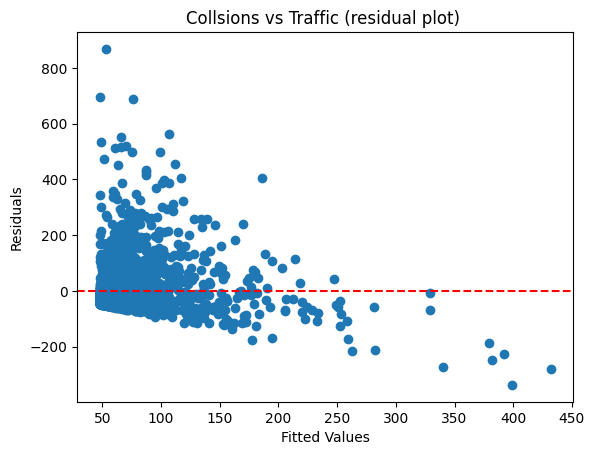

In [ ]:
import matplotlib.pyplot as plt

fitted_values = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Collsions vs Traffic (residual plot) ')
plt.show()


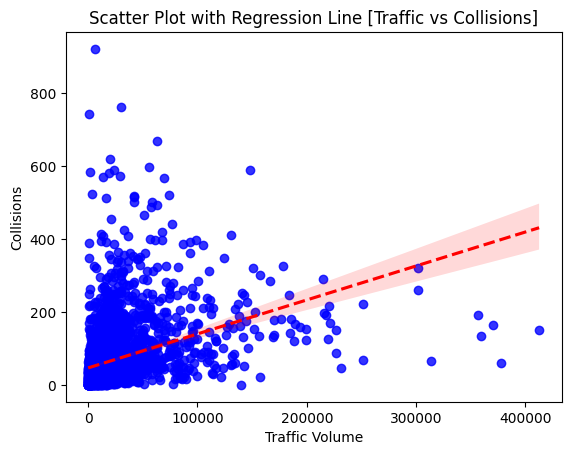

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=X['mean_total_traffic_volume'], y=y, scatter=True, color='blue', line_kws={"color": "red", "linestyle": "--"})

plt.xlabel('Traffic Volume')
plt.ylabel('Collisions')
plt.title('Scatter Plot with Regression Line [Traffic vs Collisions]')
plt.show()

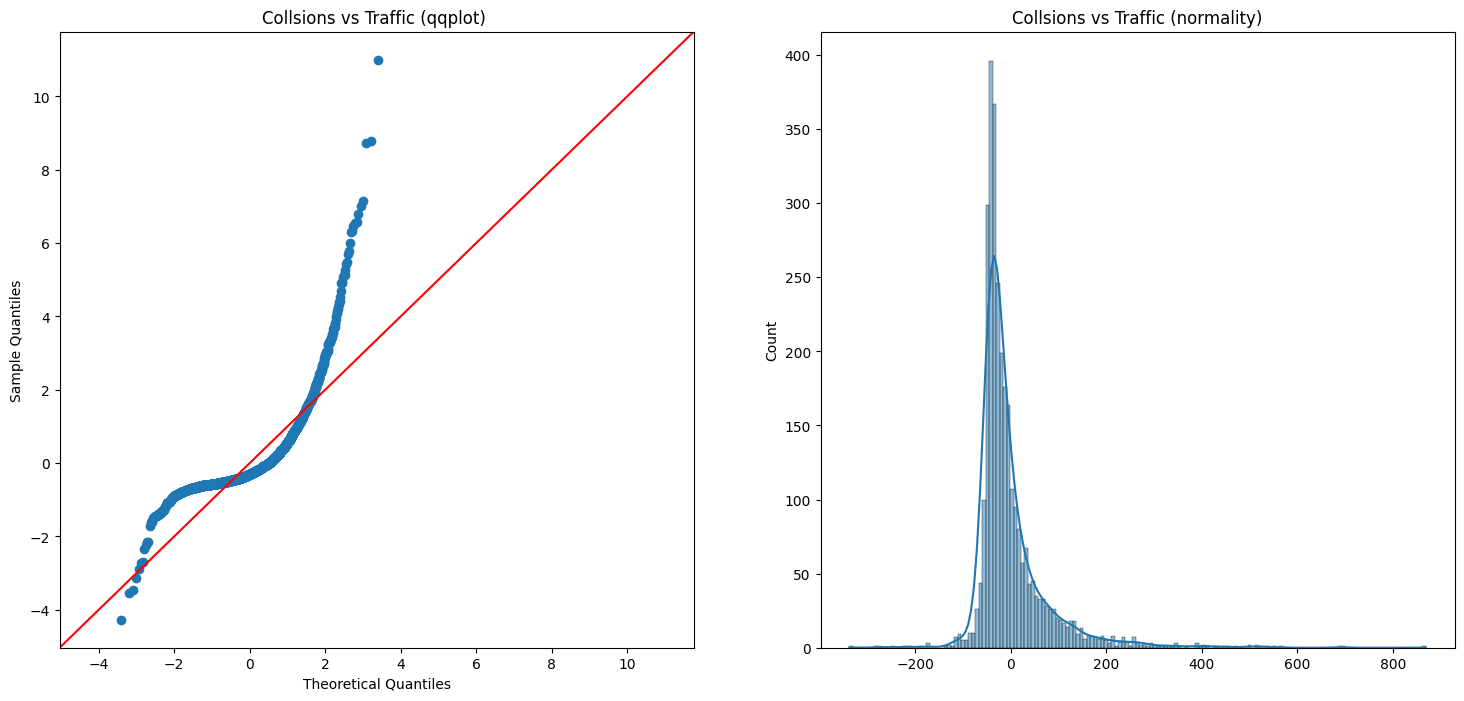

In [ ]:
import seaborn as sns
fig,ax=plt.subplots(1,2,figsize=(18,8))
sm.qqplot(residuals,line='45',fit=True,ax=ax[0])
ax[0].set_title("Collsions vs Traffic (qqplot) ")
sns.histplot(residuals,kde=True,ax=ax[1])
ax[1].set_title("Collsions vs Traffic (normality)")
plt.show()

model1

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['mean_total_traffic_volume']])

model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     364.1
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          2.44e-142
Time:                        21:30:07   Log-Likelihood:                -17333.
No. Observations:                3013   AIC:                         3.467e+04
Df Residuals:                    3010   BIC:                         3.469e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8325      1.890     17.898      0.0

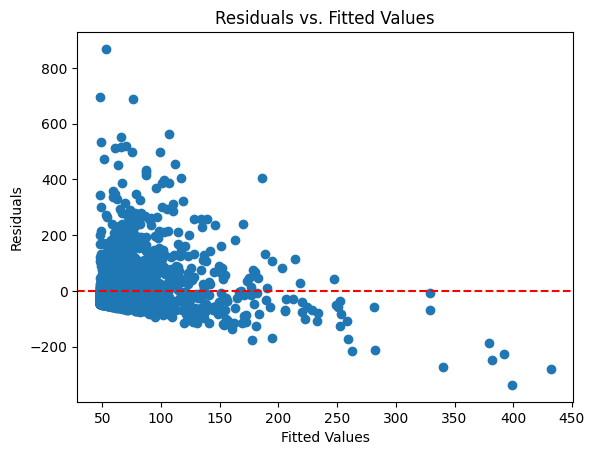

In [ ]:
fitted_values = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


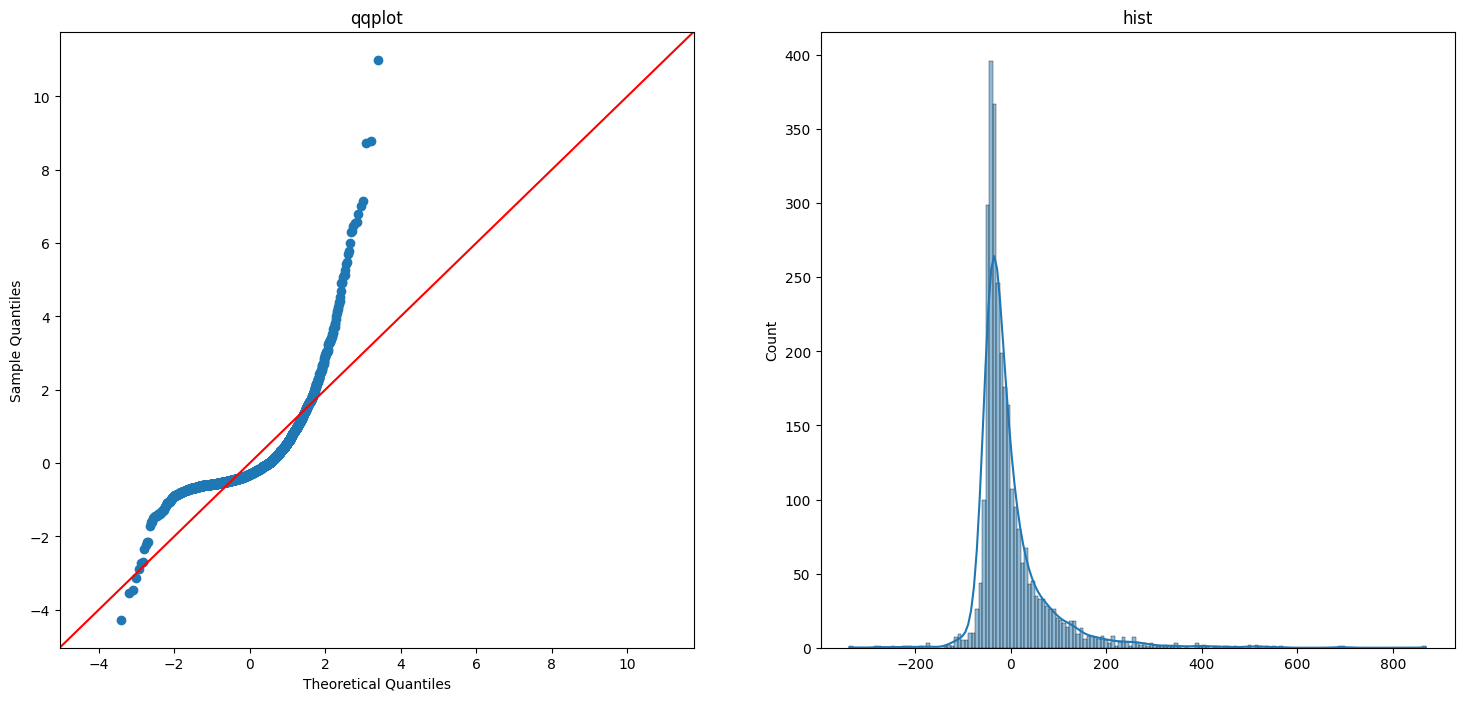

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sm.qqplot(residuals,line='45',fit=True,ax=ax[0])
ax[0].set_title("qqplot")
sns.histplot(residuals,kde=True,ax=ax[1])
ax[1].set_title("hist")
plt.show()

In [ ]:
y_log = np.log(y)
X = sm.add_constant(data[['mean_total_traffic_volume']])
model_exp = sm.OLS(y_log, X).fit()
print(model_exp.summary())
y_pred_exp = np.exp(model_exp.predict(X))


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     537.6
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          1.46e-109
Time:                        16:24:24   Log-Likelihood:                -4634.5
No. Observations:                3013   AIC:                             9273.
Df Residuals:                    3011   BIC:                             9285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

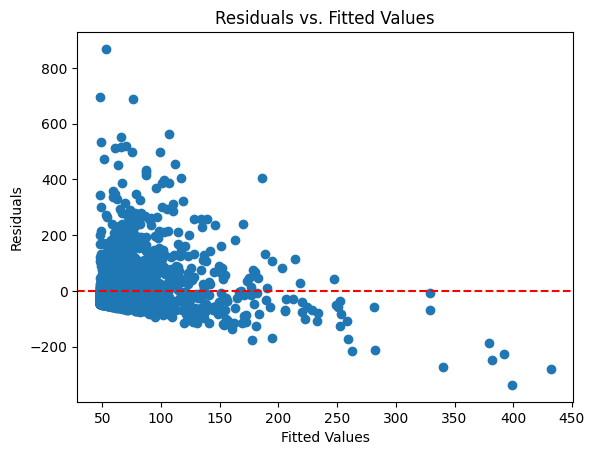

In [ ]:
fitted_values = model.fittedvalues
residuals = model.resid
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

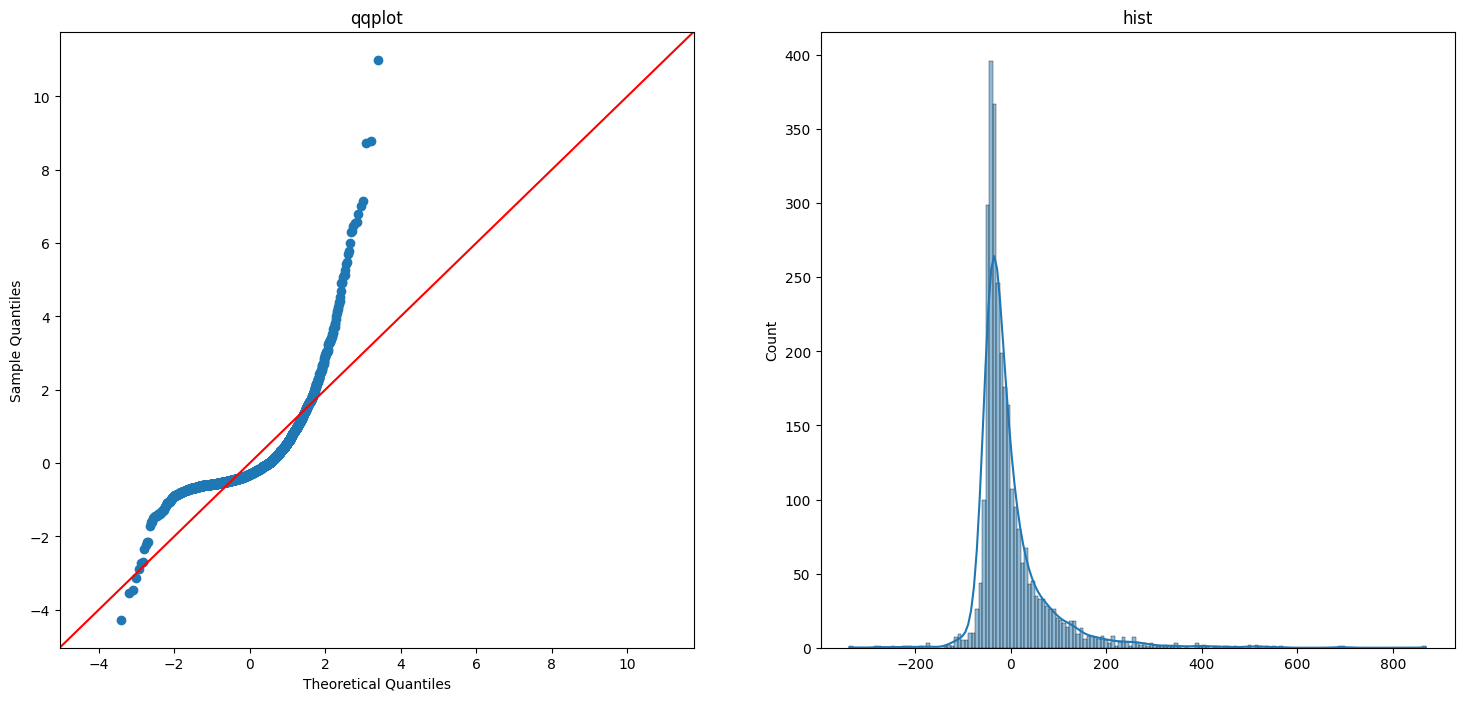

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sm.qqplot(residuals,line='45',fit=True,ax=ax[0])
ax[0].set_title("qqplot")
sns.histplot(residuals,kde=True,ax=ax[1])
ax[1].set_title("hist")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the object columns: 'month', 'day', 'place'
data['month_encoded'] = label_encoder.fit_transform(data['month'])
data['day_encoded'] = label_encoder.fit_transform(data['day'])
data['place_encoded'] = label_encoder.fit_transform(data['place'])

# Drop the original object columns if they are no longer needed
data = data.drop(['month', 'day', 'place'], axis=1)



In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

# Now data contains the label encoded columns instead of the original object columns
print(data.head())

   location_id  mean_distance_to_red_light_camera  mean_total_cyclist_volume  \
0         1146                              155.0                       10.0   
1         3925                              642.0                        3.0   
2         3926                              524.0                      332.0   
3         3927                              197.0                       60.0   
4         3931                              105.0                     2116.0   

   mean_total_pedestrian_volume  mean_total_traffic_volume  \
0                         515.0                    23616.0   
1                          68.0                     9887.0   
2                        3082.0                    36890.0   
3                         783.0                    21869.0   
4                       10533.0                    45867.0   

   mean_distance_to_intersection  red_light_intersection  \
0                      41.359740                       0   
1                      50.

In [ ]:
import statsmodels.api as sm
X = (data[['hour', 'year', 'month_encoded','day_encoded']])
y = data['count']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     93.78
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           2.89e-75
Time:                        21:50:44   Log-Likelihood:                -17483.
No. Observations:                3013   AIC:                         3.498e+04
Df Residuals:                    3008   BIC:                         3.501e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.333e+04   2711.480    -12.293

model2

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['hour', 'year', 'month_encoded','day_encoded']])
y=data['count']
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     35.70
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           5.91e-90
Time:                        21:45:57   Log-Likelihood:                -17428.
No. Observations:                3013   AIC:                         3.489e+04
Df Residuals:                    2998   BIC:                         3.498e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.36e+07   5.25e+06     -2.591      0.0

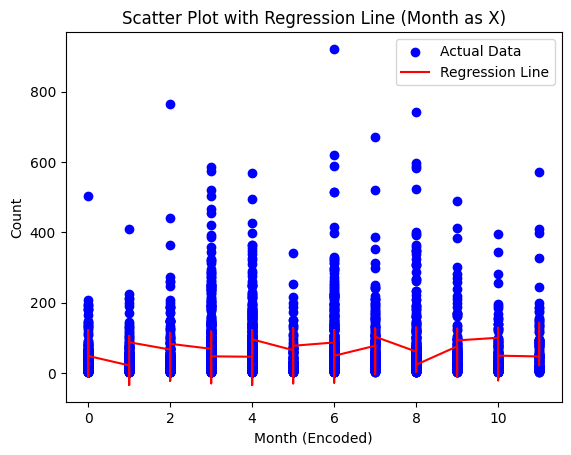

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# X and y are already defined, fitting the model
X = sm.add_constant(data[['hour', 'year', 'month_encoded', 'day_encoded']])
y = data['count']

model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

# Plot scatter of actual values using month_encoded as x-axis
plt.scatter(data['month_encoded'], y, color='blue', label='Actual Data')

# Sort 'month_encoded' values to get a smooth regression line
sorted_index = np.argsort(data['month_encoded'])
sorted_month = data['month_encoded'].values[sorted_index]
sorted_y_pred = y_pred[sorted_index]

# Plot regression line
plt.plot(sorted_month, sorted_y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Month (Encoded)')
plt.ylabel('Count')
plt.title('Scatter Plot with Regression Line (Month as X)')
plt.legend()
plt.show()


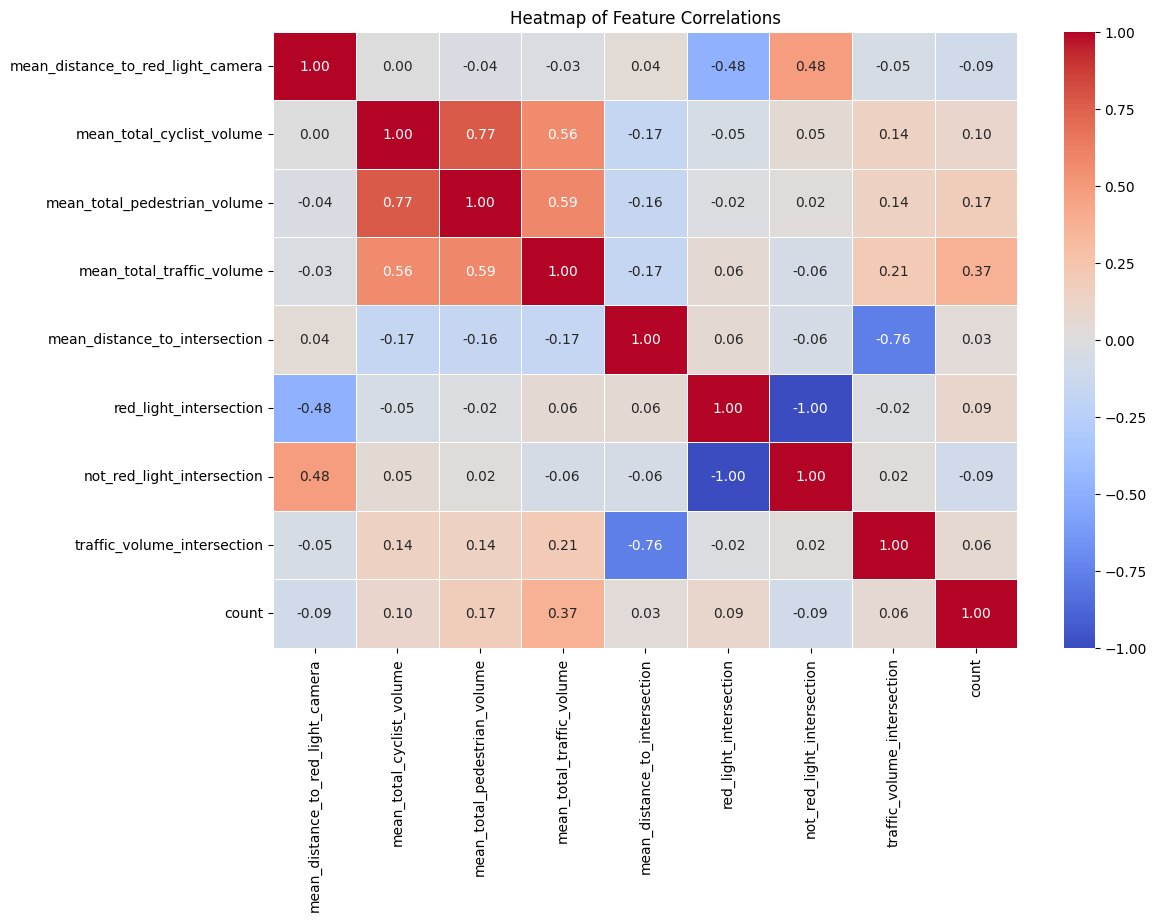

In [ ]:
data1=data.drop(['location_id','AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER',
       'BICYCLE', 'PEDESTRIAN', 'hour', 'year', 'month_encoded',
       'day_encoded', 'place_encoded','injuries_collisons', 'PD_COLLISIONS', 'FTR_COLLISIONS'],axis=1)
corr_matrix = data1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

model3

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['red_light_intersection','not_red_light_intersection']])
y=data['count']
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     572.2
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          6.47e-116
Time:                        22:13:06   Log-Likelihood:                -17398.
No. Observations:                3013   AIC:                         3.480e+04
Df Residuals:                    3011   BIC:                         3.481e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.159e+13   5.23e+14     -0.060      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


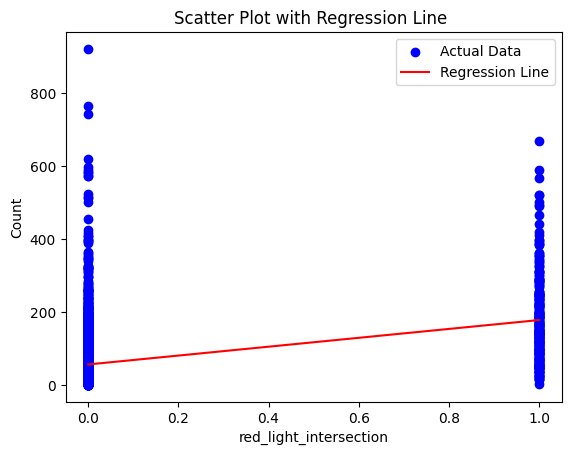

In [ ]:
plt.scatter(data['red_light_intersection'], y, color='blue', label='Actual Data')

# Sort 'month_encoded' values to get a smooth regression line
sorted_index = np.argsort(data['red_light_intersection'])
sorted_month = data['red_light_intersection'].values[sorted_index]
sorted_y_pred = y_pred[sorted_index]

# Plot regression line
plt.plot(sorted_month, sorted_y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('red_light_intersection')
plt.ylabel('Count')
plt.title('Scatter Plot with Regression Line ')
plt.legend()
plt.show()

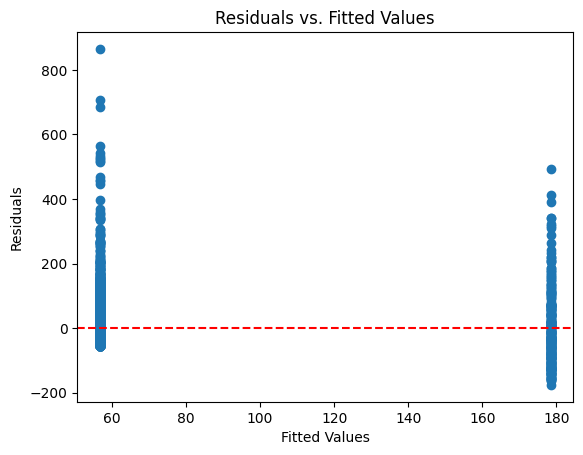

In [ ]:
model=model_poly
fitted_values = model.fittedvalues
residuals = model.resid
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


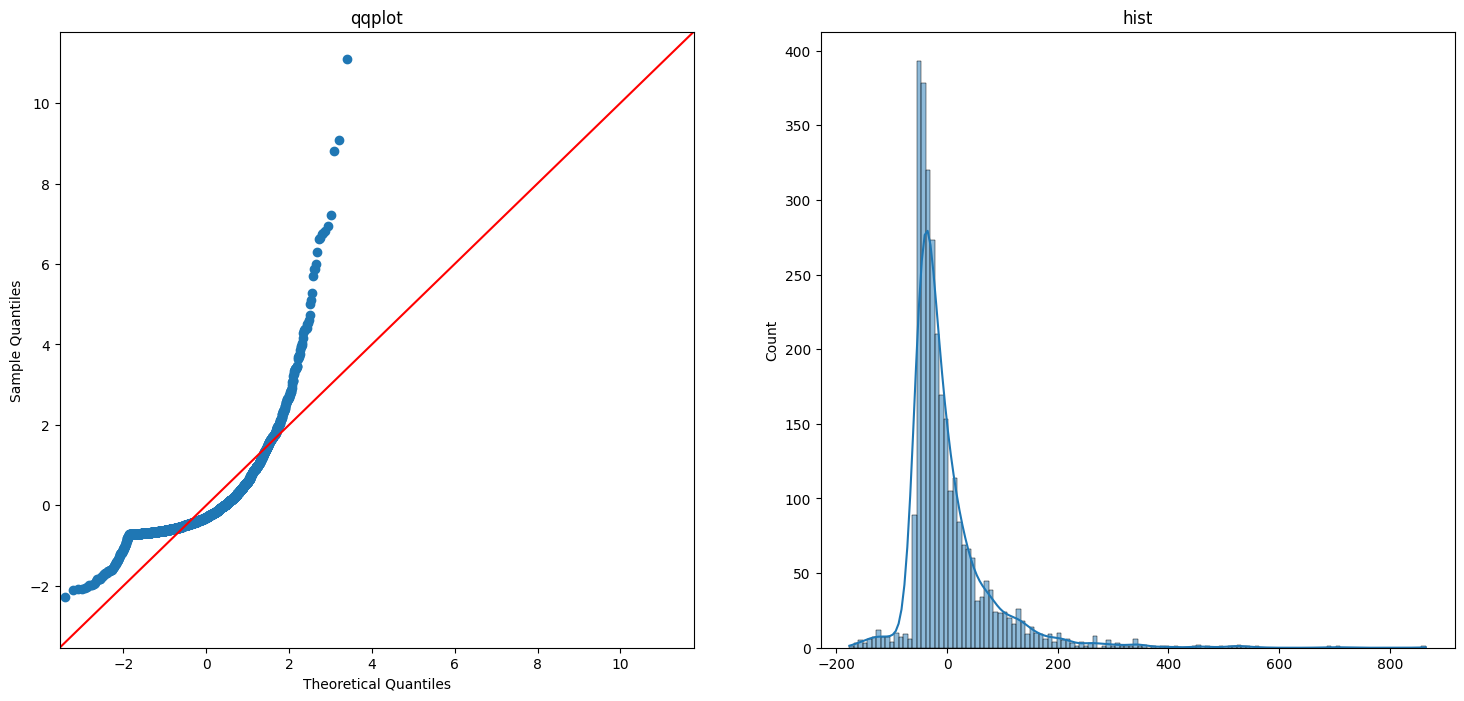

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sm.qqplot(residuals,line='45',fit=True,ax=ax[0])
ax[0].set_title("qqplot")
sns.histplot(residuals,kde=True,ax=ax[1])
ax[1].set_title("hist")
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['red_light_intersection','not_red_light_intersection']])
y=data['mean_total_traffic_volume']
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

                                OLS Regression Results                               
Dep. Variable:     mean_total_traffic_volume   R-squared:                       0.095
Model:                                   OLS   Adj. R-squared:                  0.095
Method:                        Least Squares   F-statistic:                     315.5
Date:                       Wed, 09 Oct 2024   Prob (F-statistic):           3.28e-67
Time:                               20:18:30   Log-Likelihood:                -35537.
No. Observations:                       3013   AIC:                         7.108e+04
Df Residuals:                           3011   BIC:                         7.109e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
#model3
import statsmodels.api as sm
X =data[['red_light_intersection','not_red_light_intersection']]
y = data['count']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     286.0
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          1.90e-114
Time:                        21:42:44   Log-Likelihood:                -17398.
No. Observations:                3013   AIC:                         3.480e+04
Df Residuals:                    3010   BIC:                         3.482e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['red_light_intersection','not_red_light_intersection']])
y=data['count']
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     572.2
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          6.47e-116
Time:                        21:41:27   Log-Likelihood:                -17398.
No. Observations:                3013   AIC:                         3.480e+04
Df Residuals:                    3011   BIC:                         3.481e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.159e+13   5.23e+14     -0.060      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
data.columns

Index(['Unnamed: 0', 'location_id', 'mean_distance_to_red_light_camera',
       'mean_total_cyclist_volume', 'mean_total_pedestrian_volume',
       'mean_total_traffic_volume', 'mean_distance_to_intersection',
       'red_light_intersection', 'not_red_light_intersection',
       'injuries_collisons', 'PD_COLLISIONS', 'FTR_COLLISIONS',
       'traffic_volume_intersection', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER',
       'BICYCLE', 'PEDESTRIAN', 'month', 'day', 'hour', 'year', 'place',
       'count'],
      dtype='object')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/combined_table (2).csv")

In [ ]:
red = df[df['red_light_intersection'] == 1]
red


Unnamed: 0  location_id  mean_distance_to_red_light_camera  \
3              3         3927                                0.0   
4              4         3931                                3.0   
18            18         3952                                0.0   
19            19         3953                                0.0   
26            26         3970                                0.0   
...          ...          ...                                ...   
1438        1438         7261                                2.0   
1440        1440         7320                                0.0   
1447        1447         9772                                3.0   
1754        1754        26498                                0.0   
1900        1900        31085                                0.0   

      mean_total_cyclist_volume  mean_total_pedestrian_volume  \
3                          60.0                         783.0   
4                        2116.0                       10533.0   
18                        328.0                        1719.0   
19                        279.0                       12282.0   
26                          0.0                         656.0   
...                         ...                           ...   
1438                       21.0                        1414.0   
1440                      265.0                       16142.0   
1447                     1573.0                       16098.0   
1754                      745.0                       21846.0   
1900                        7.0                        1794.0   

      mean_total_traffic_volume  mean_distance_to_intersection  \
3                       21869.0                      11.017690   
4                       45867.0                       5.964679   
18                     114604.0                      24.660945   
19                     166677.0                      40.495718   
26                      75125.0                      36.384038   
...                         ...                            ...   
1438                    37535.0                      26.237535   
1440                    64637.0                       5.220265   
1447                     5459.0                     160.626936   
1754                    11563.0                      31.283624   
1900                    26199.0                      92.595993   

      red_light_intersection  not_red_light_intersection  injuries_collisons  \
3                          1                           0                 0.0   
4                          1                           0                 0.0   
18                         1                           0                 0.0   
19                         1                           0                 0.0   
26                         1                           0                 0.0   
...                      ...                         ...                 ...   
1438                       1                           0                 0.0   
1440                       1                           0                 0.0   
1447                       1                           0                 0.0   
1754                       1                           0                 0.0   
1900                       1                           0                 0.0   

      ...  MOTORCYCLE  PASSENGER  BICYCLE  PEDESTRIAN     month        day  \
3     ...         0.0        0.0      0.0         0.0      June     Monday   
4     ...         0.0        0.0      0.0         0.0    August    Tuesday   
18    ...         0.0        0.0      0.0         0.0     March   Thursday   
19    ...         0.0        0.0      0.0         0.0  February     Friday   
26    ...         0.0        0.0      0.0         0.0  December   Thursday   
...   ...         ...        ...      ...         ...       ...        ...   
1438  ...         0.0        0.0      0.0         0.0     April    Tuesday   
1440  ...         0.0        0

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(red[['mean_total_traffic_volume']])
y=red['count']
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     8.547
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           0.000256
Time:                        00:55:11   Log-Likelihood:                -1577.2
No. Observations:                 256   AIC:                             3160.
Df Residuals:                     253   BIC:                             3171.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.8652     15.987      7.498      0.0

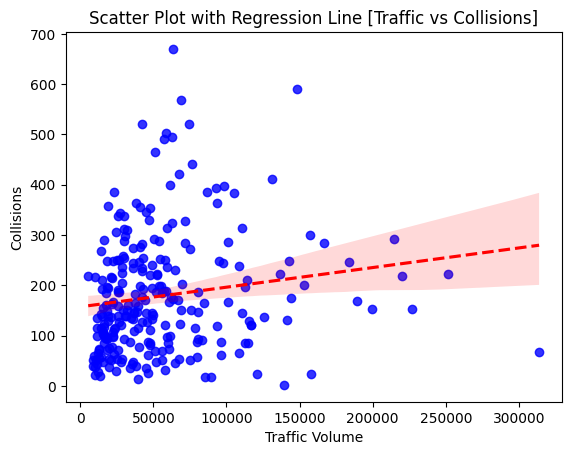

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=red['mean_total_traffic_volume'], y=y, scatter=True, color='blue', line_kws={"color": "red", "linestyle": "--"})

plt.xlabel('Traffic Volume')
plt.ylabel('Collisions')
plt.title('Scatter Plot with Regression Line [Traffic vs Collisions]')
plt.show()

In [ ]:
not_red = df[df['not_red_light_intersection'] == 1]
not_red

Unnamed: 0  location_id  mean_distance_to_red_light_camera  \
0              0         1146                              343.0   
1              1         3925                              720.0   
2              2         3926                              487.0   
5              5         3934                              469.0   
6              6         3935                              386.0   
...          ...          ...                                ...   
3008        3008        51249                              402.0   
3009        3009        51250                              476.0   
3010        3010        51251                              148.0   
3011        3011        51275                              172.0   
3012        3012        51277                              307.0   

      mean_total_cyclist_volume  mean_total_pedestrian_volume  \
0                          10.0                         515.0   
1                           3.0                          68.0   
2                         332.0                        3082.0   
5                          28.0                        1522.0   
6                         144.0                         580.0   
...                         ...                           ...   
3008                       90.0                         147.0   
3009                      397.0                        2662.0   
3010                       71.0                          77.0   
3011                       25.0                          82.0   
3012                      441.0                        2266.0   

      mean_total_traffic_volume  mean_distance_to_intersection  \
0                       23616.0                      41.359740   
1                        9887.0                      50.550801   
2                       36890.0                      10.794927   
5                       10720.0                      55.465682   
6                       17305.0                      53.732346   
...                         ...                            ...   
3008                    11792.0                      66.324344   
3009                     3489.0                      57.114932   
3010                    10553.0                      30.106459   
3011                     2934.0                       1.382888   
3012                     4553.0                      24.276071   

      red_light_intersection  not_red_light_intersection  injuries_collisons  \
0                          0                           1                 0.0   
1                          0                           1                 0.0   
2                          0                           1                 0.0   
5                          0                           1                 0.0   
6                          0                           1                 0.0   
...                      ...                         ...                 ...   
3008                       0                           1                 0.0   
3009                       0                           1                 0.0   
3010                       0                           1                 0.0   
3011                       0                           1                 0.0   
3012                       0                           1                 0.0   

      ...  MOTORCYCLE  PASSENGER  BICYCLE  PEDESTRIAN      month        day  \
0     ...         0.0        0.0      0.0         0.0       July    Tuesday   
1     ...         0.0        0.0      0.0         0.0    October  Wednesday   
2     ...         0.0        0.0      0.0         0.0      April   Thursday   
5     ...         0.0        0.0      0.0         0.0        May   Saturday   
6     ...         0.0        0.0      0.0         0.0    October     Friday   
...   ...         ...        ...      ...         ...        ...        ...   
3008  ...         0.0        0.0      0.0         0.0   December     Friday   
3009  ...         0.0 

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(not_red[['mean_total_traffic_volume']])
y=not_red['count']
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           1.26e-85
Time:                        00:45:32   Log-Likelihood:                -15544.
No. Observations:                2757   AIC:                         3.109e+04
Df Residuals:                    2754   BIC:                         3.111e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3826      1.740     19.757      0.0

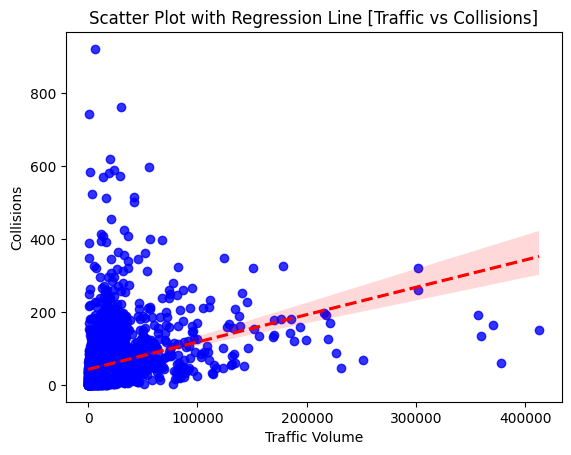

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=not_red['mean_total_traffic_volume'], y=y, scatter=True, color='blue', line_kws={"color": "red", "linestyle": "--"})

plt.xlabel('Traffic Volume')
plt.ylabel('Collisions')
plt.title('Scatter Plot with Regression Line [Traffic vs Collisions]')
plt.show()